# Week 6 - Classification

This week, we shift from gathering human textual classifications through crowdsourcing, to using machine learning models and algorithms that train on those human classifications and extend them to documents far too numerous to read. If you recall, *clustering* allows us to stably partition text data (e.g., documents, turns of conversation) according to all patterns of covariation among available text features. *Classification*, by contrast, partitions text data according to only those features and their variation that enable us to mimic and extrapolate human annotations.

In this notebook, we will show how to use a variety of classification methods, including Naïve Bayes, Logistic regression, K-nearest neighbor, decision trees and random forests, support vector machines and even a simple neural network, the perceptron. We will also demonstrate ensemble techniques that can link several such methods into a single, more accurate, classification pipeline. We will finally learn to use conventions and metrics to evaluate classifier performance on out-of-sample data. 

For this notebook we will be using the following packages.

In [235]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import nltk #For tokenizing and normalizing
import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

# Simple Simulated Examples

Here we create a sandbox for you to explore different types of classified data and how different statistical classifiers perform on each type.

## Generating example data

We start by loading one of the "cartoon" or simplified data sets and then dividing it into training and testing sets. To maximize our ability to visualize, each dataset involves two classes, colored yellow and blue, arrayed along two two dimensions (`x` and `y`). 

The four data patterns include: 
+ `random` in which the two classes are randomly distributed across both dimensions
+ `andSplit` in which the two classes are linearly split along one of two dimensions (e.g., men like Adidas)
+ `xorSplit` in which the two classes are split, oppositely, along each dimension (e.g., old ladies and young men like Nikes)
+ `targetSplit` in which one class is nested within the other in two dimensions (e.g., middle aged, middle income people like vintage Mustangs)
+ `multiBlobs` in which 5 classes are placed as bivariate Gaussians at random locations

`noise` is a variable [0-1] that ranges from no noise in the prescribed pattern [0] to complete noise/randomness [1].

Uncomment (remove the # in front of) each dataset, one at a time, and then run the cell and subsequent cells to examine how each machine learning approach captures each pattern.

In [33]:
noise = .2

#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.random())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise))
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise)) #Please try this one
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise))
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise))

We can easily visualize the rendered datasets because they are generated in two dimensions.

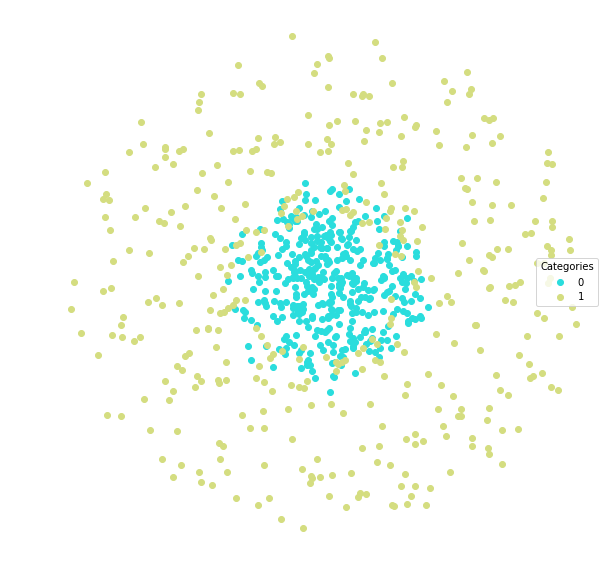

In [35]:
lucem_illud.plotter(dfTrain)

## Training a Machine Learning algorithm

We can now pick a model, there are many more options in `scikit-learn`. These are just a few examples, which array along the machine learning "tribes" described in Pedro Domingos _The Master Algorithm_.

Uncomment (remove the # in front of) each algorithm one at a time, then run the cell and subsequent cells to evaluate how it learns to understand the data.

In [38]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

Now we fit the model by giving it our training data

In [39]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

GaussianNB(priors=None)

## Algorithm evaluation

We can look at few measurements of each classifier's performance by using the testing set

In [40]:
lucem_illud.evaluateClassifier(clf, dfTest)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.946617,0.902570,0.055,0.911765,0.978947
1,0.946617,0.940627,0.055,0.979592,0.914286


This lets us look at which classes do better:

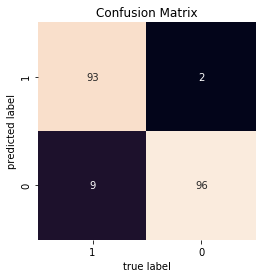

In [41]:
lucem_illud.plotConfusionMatrix(clf, dfTest)

The greater the area under the curve the better.

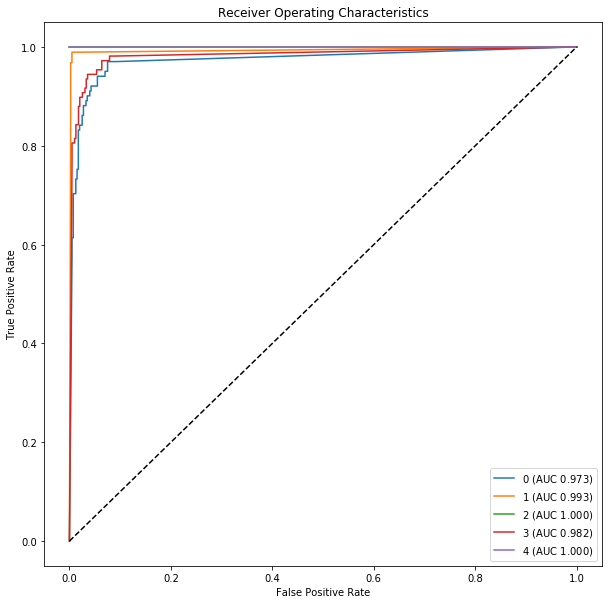

In [10]:
lucem_illud.plotMultiROC(clf, dfTest)

We can also look at the regions the classifer identifies as one class or the other:

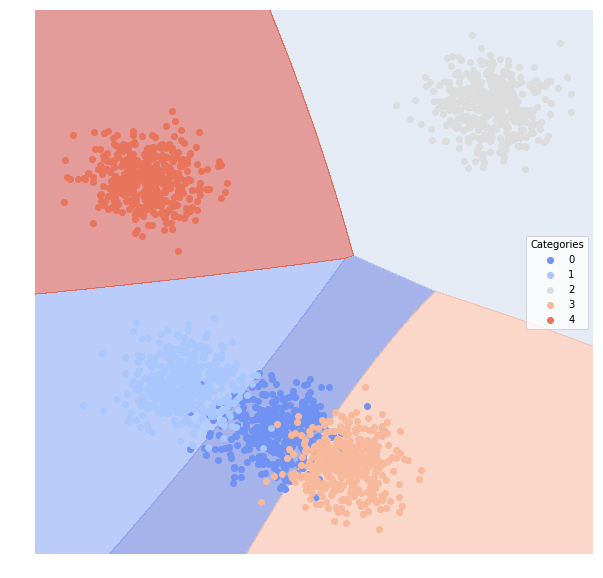

In [16]:
lucem_illud.plotregions(clf, dfTrain)

## Now we do the same for real data

Available data sets include:
+ Reddit threads "classified" by thread topic
+ 20 newsgroups "classified" by group topic
+ Senate press releases "classified" by Senator (2 senators)
+ Senate press releases "classified" by Senator (5 senators)
+ Emails classified as Spam or Ham

In [17]:
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadReddit())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadNewsGroups())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSenateSmall())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSenateLarge())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSpam())

Loading Reddit data
Converting to vectors


In [18]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up, but lose ROC
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

In [19]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

GaussianNB(priors=None)

In [20]:
lucem_illud.evaluateClassifier(clf, dfTest)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Relationships,0.723006,0.455909,0.159875,0.679245,0.514286
Tales From Tech Support,0.906254,0.812733,0.050157,0.935484,0.828571
Weeaboo Tales,0.864163,0.645591,0.156740,0.676923,0.916667
Bad Roommates,0.799214,0.595222,0.141066,0.756757,0.674699


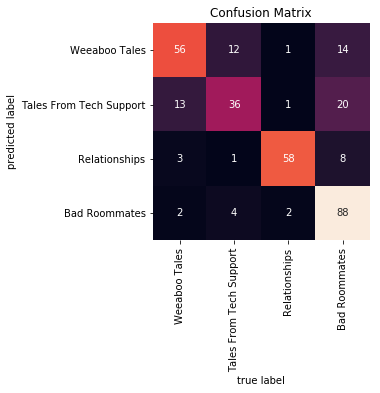

In [21]:
lucem_illud.plotConfusionMatrix(clf, dfTest)

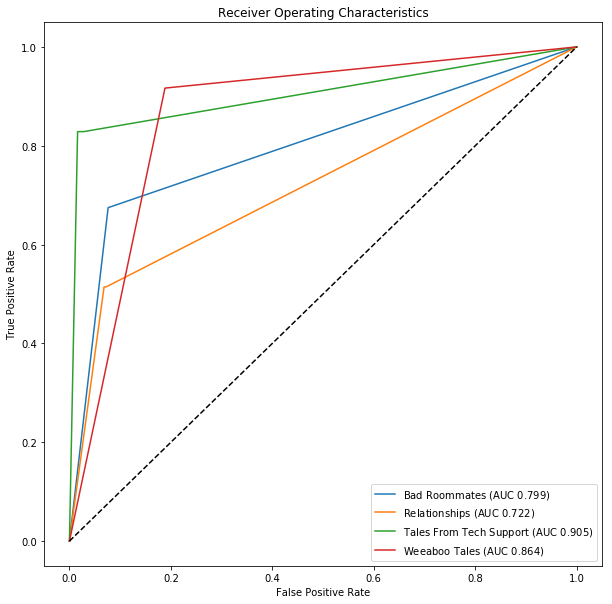

In [22]:
lucem_illud.plotMultiROC(clf, dfTest)

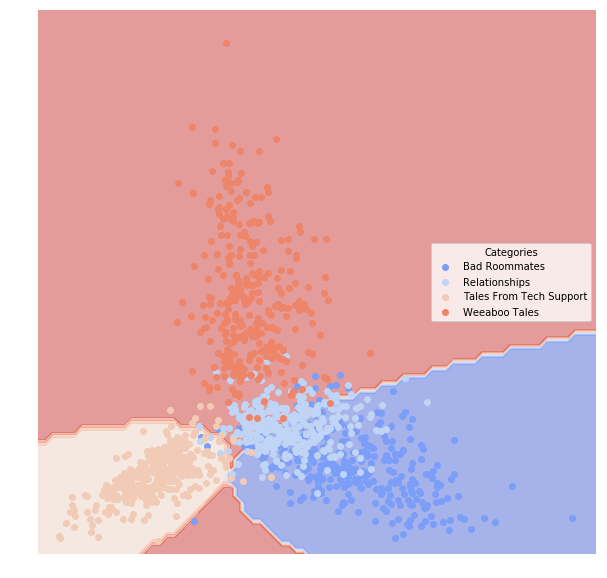

In [23]:
lucem_illud.plotregions(clf, dfTrain)

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

In [36]:
#  generate 10 distinct artificial datasets and classify them
noise = 0.1
noise2 = 0.3
noise3 = 0.5

dfTrain1, dfTest1 = lucem_illud.trainTestSplit(lucem_illud.random())
dfTrain2, dfTest2 = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise))
dfTrain3, dfTest3 = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise))
dfTrain4, dfTest4 = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise))
dfTrain5, dfTest5 = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise))
dfTrain6, dfTest6 = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise2))
dfTrain7, dfTest7 = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise2))
dfTrain8, dfTest8 = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise2))
dfTrain9, dfTest9 = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise3))
dfTrain0, dfTest0 = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise3))

In [42]:
# initialize different ML models
nbclf = sklearn.naive_bayes.GaussianNB()
svmclf = sklearn.svm.SVC(kernel = 'linear', probability = True) 
knclf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')
crclf = sklearn.linear_model.LogisticRegression()
dtclf = sklearn.tree.DecisionTreeClassifier()
rfclf = sklearn.ensemble.RandomForestClassifier()
nnclf = sklearn.neural_network.MLPClassifier()
gbclf = sklearn.ensemble.GradientBoostingClassifier()

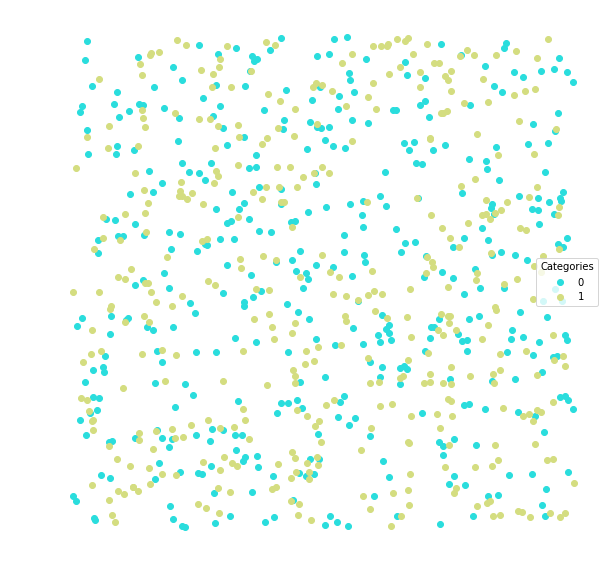

In [43]:
# for dataset 1:
lucem_illud.plotter(dfTrain1)

In [81]:
# fit the models
nbclf.fit(np.stack(dfTrain1['vect'], axis=0), dfTrain1['category'])
svmclf.fit(np.stack(dfTrain1['vect'], axis=0), dfTrain1['category'])
knclf.fit(np.stack(dfTrain1['vect'], axis=0), dfTrain1['category'])
crclf.fit(np.stack(dfTrain1['vect'], axis=0), dfTrain1['category'])
dtclf.fit(np.stack(dfTrain1['vect'], axis=0), dfTrain1['category'])
rfclf.fit(np.stack(dfTrain1['vect'], axis=0), dfTrain1['category'])
nnclf.fit(np.stack(dfTrain1['vect'], axis=0), dfTrain1['category'])
gbclf.fit(np.stack(dfTrain1['vect'], axis=0), dfTrain1['category'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [95]:
# write a little helpfer function that takes input and spits out the three diff evaluations
def xyEva(cfier, trainset, testset):
    print(lucem_illud.evaluateClassifier(cfier, testset))
    lucem_illud.plotConfusionMatrix(cfier, testset)
    lucem_illud.plotMultiROC(cfier, testset)
    lucem_illud.plotregions(cfier, trainset)

#helper function to fit the models

def xyFit(dset):
    nbclf.fit(np.stack(dset['vect'], axis=0), dset['category'])
    svmclf.fit(np.stack(dset['vect'], axis=0), dset['category'])
    knclf.fit(np.stack(dset['vect'], axis=0), dset['category'])
    crclf.fit(np.stack(dset['vect'], axis=0), dset['category'])
    dtclf.fit(np.stack(dset['vect'], axis=0), dset['category'])
    rfclf.fit(np.stack(dset['vect'], axis=0), dset['category'])
    nnclf.fit(np.stack(dset['vect'], axis=0), dset['category'])
    gbclf.fit(np.stack(dset['vect'], axis=0), dset['category'])

               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.403382           0.421107         0.6   0.372727  0.445652
1         0.403382           0.501481         0.6   0.433333  0.361111


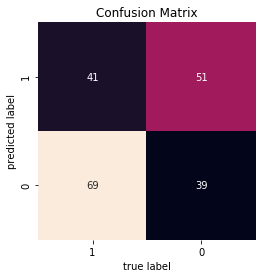

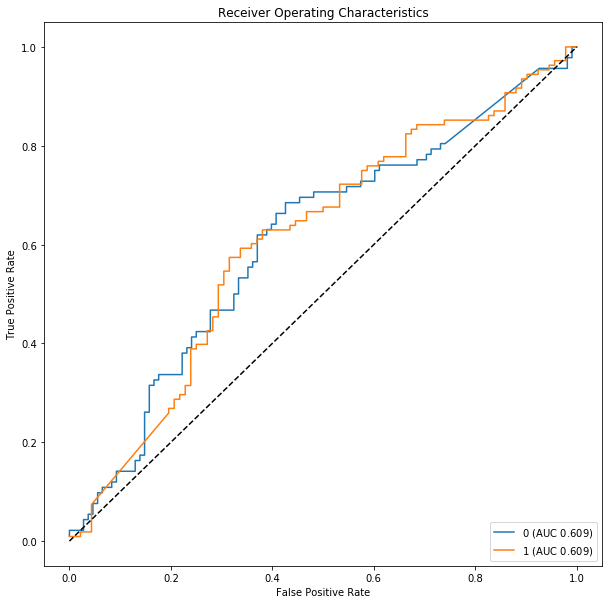

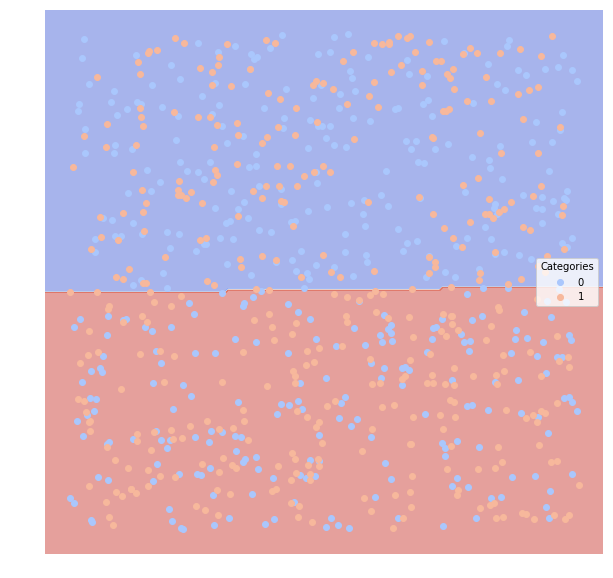

In [94]:
xyEva(svmclf, dfTrain1, dfTest1)

None of the algorithms performed particularly well with the random data; SVM performed the best of all of them, but even then, it wasn't great. This makes sense since there wasn't any pattern inherent to the data for the machoine learning algorithms to pick up.

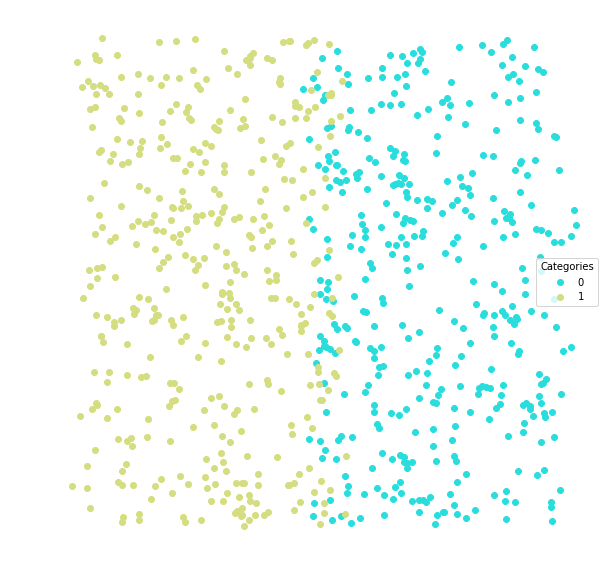

/Users/xiangyu/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [96]:
#show what the data looks like:
lucem_illud.plotter(dfTrain2)

#fit model to data
xyFit(dfTrain2)

               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.932828           0.911967       0.065   0.929204  0.954545
1         0.932828           0.898748       0.065   0.942529  0.911111


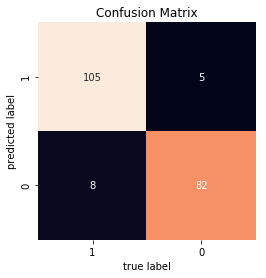

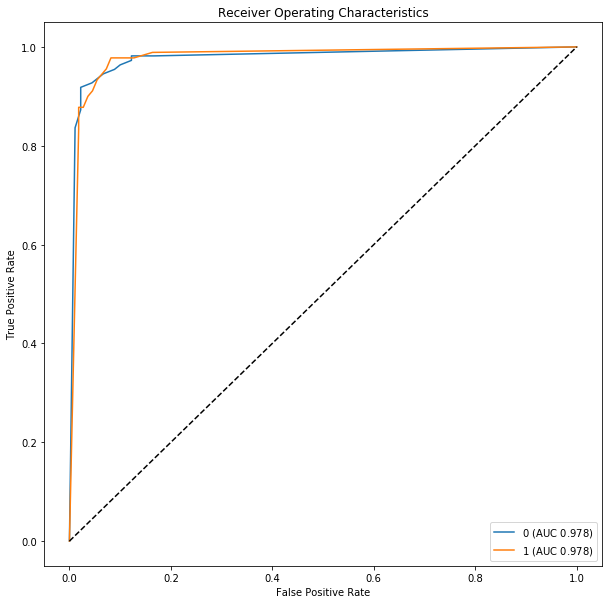

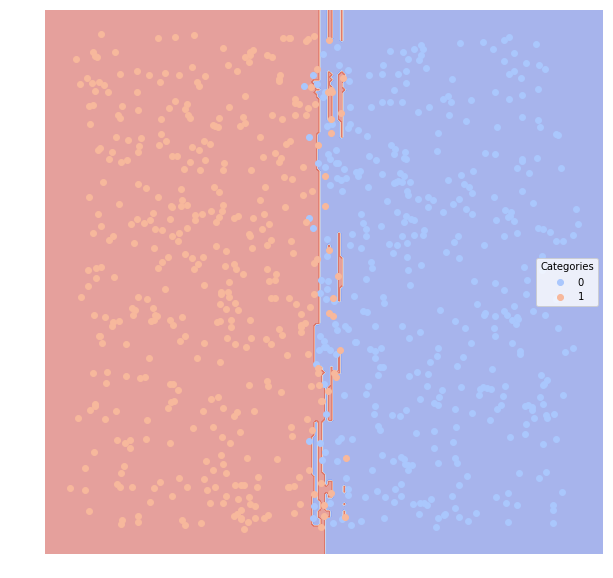

In [108]:
xyEva(rfclf, dfTrain2, dfTest2)

They all do really well. I used the Random Forest classifier as an example.

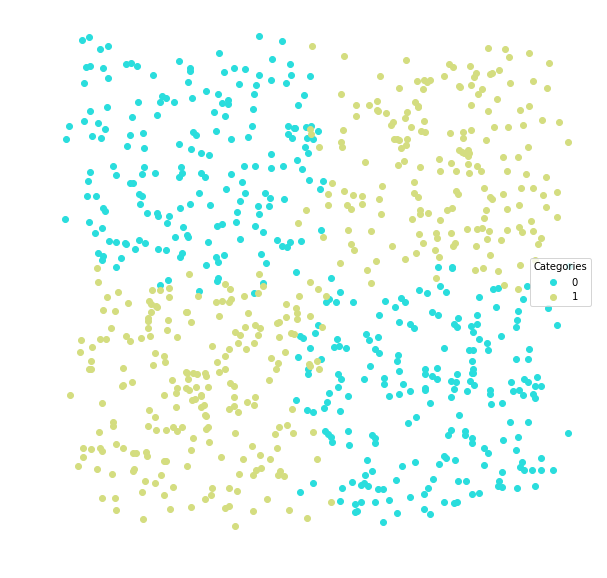

/Users/xiangyu/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [111]:
#show what the data set 3 looks like:
lucem_illud.plotter(dfTrain3)
xyFit(dfTrain3)

               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.482134           0.507703        0.53   0.421053  0.077670
1         0.482134           0.476256        0.53   0.475138  0.886598


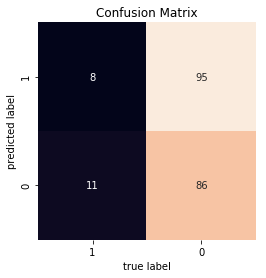

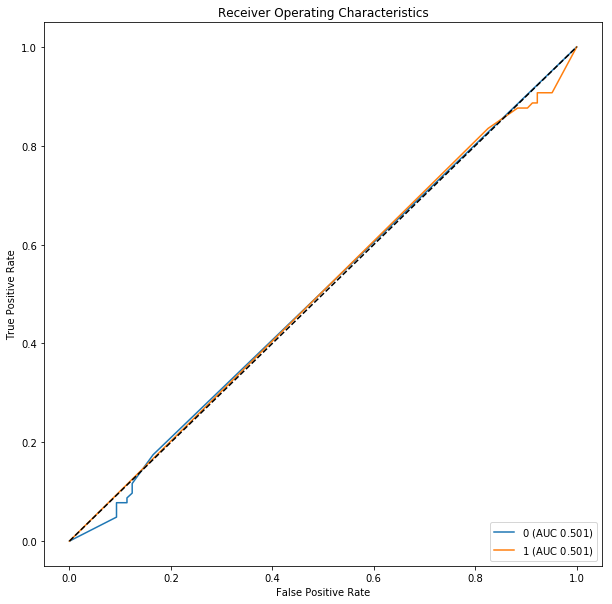

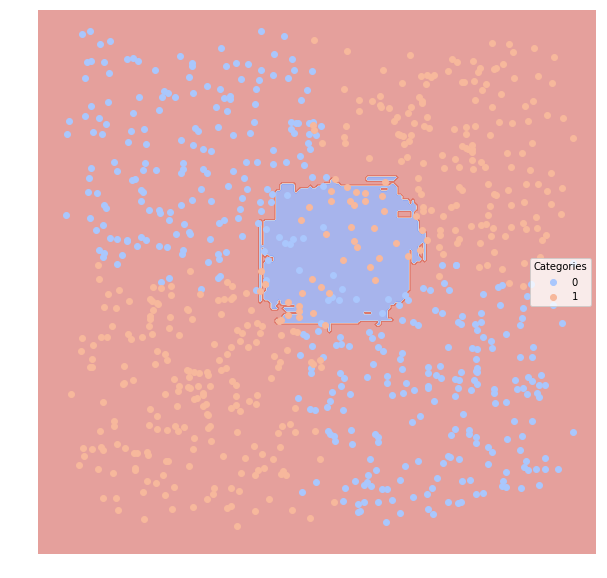

In [129]:
xyEva(rfclf, dfTrain3,dfTest3)

All of the non-linear classifiers (Random Foest, Decision Tree, Neutral Net and Gradient Boost) performed well. Makes sense since the data has a non-linear distribution.

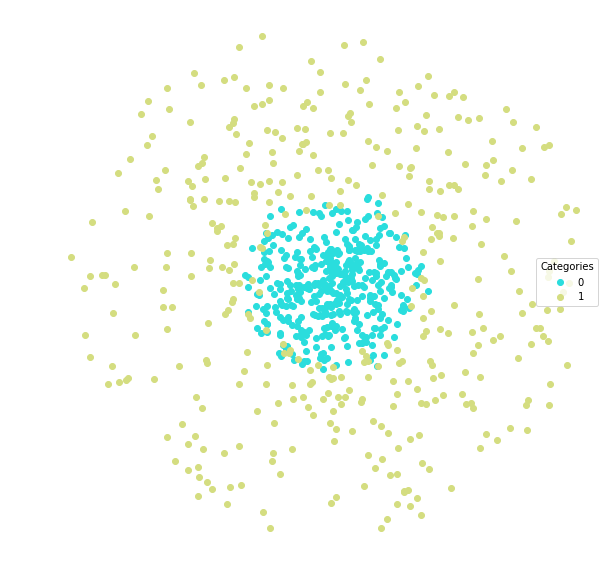

/Users/xiangyu/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [130]:
#show what the data set 4 looks like:
lucem_illud.plotter(dfTrain4)
xyFit(dfTrain4)

               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.940576           0.900498        0.06   0.913462  0.969388
1         0.940576           0.928272        0.06   0.968750  0.911765


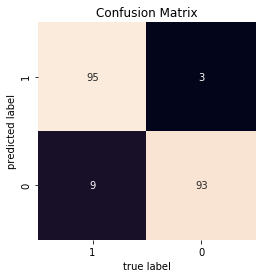

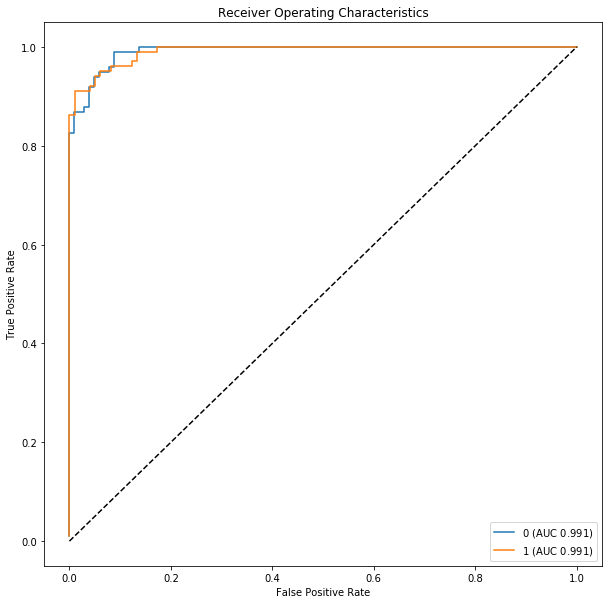

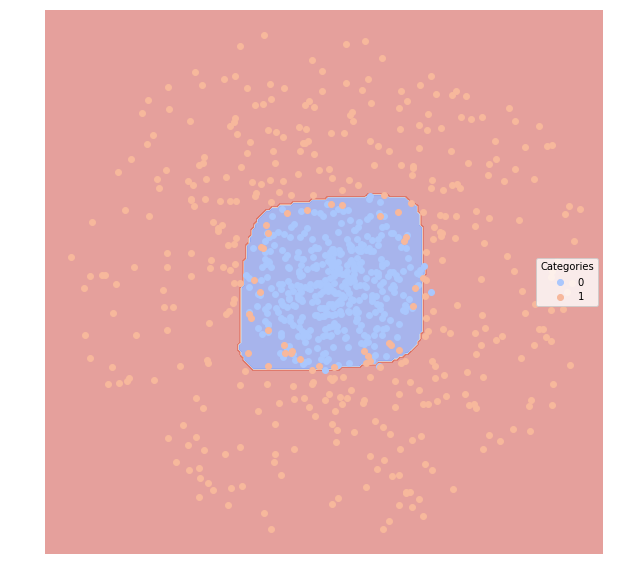

In [139]:
xyEva(nnclf, dfTrain4, dfTest4)

Everything but SVM performed well. SVM couldn't capture the relationship of the data by its linear divisions.

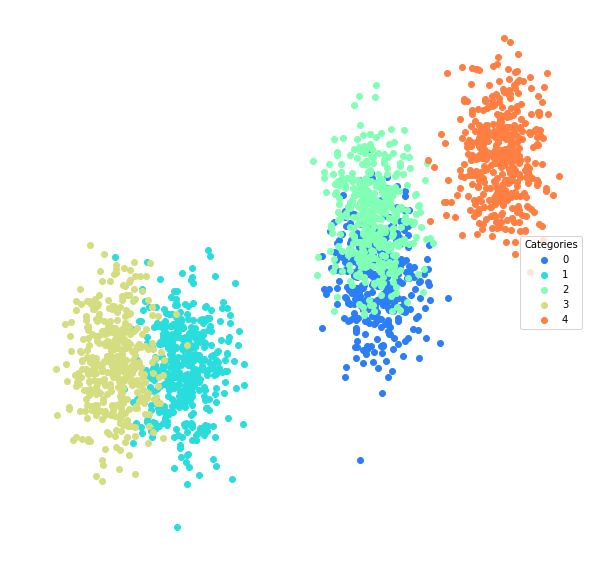

In [140]:
#show what the data set 5 looks like:
lucem_illud.plotter(dfTrain5)
xyFit(dfTrain5)

               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.880652           0.712244       0.078   0.830189  0.807339
1         0.977278           0.883644       0.022   0.901099  0.976190
2         0.881737           0.693721       0.078   0.805825  0.813725
3         0.953792           0.911608       0.022   0.979167  0.912621
4         0.997487           0.980769       0.004   0.980769  1.000000


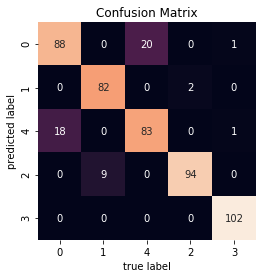

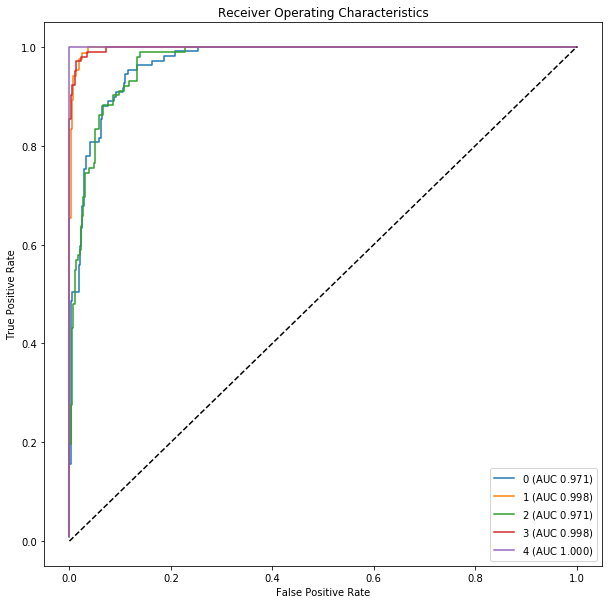

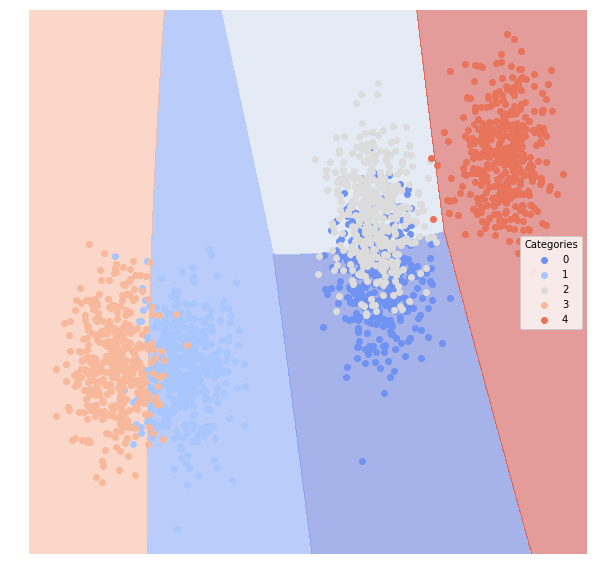

In [150]:
xyEva(nbclf, dfTrain5, dfTest5)

All of the algorithms perform well. I suppose none of the methods they use are disadvantaged in any way by the specific clustering of this particular data set?

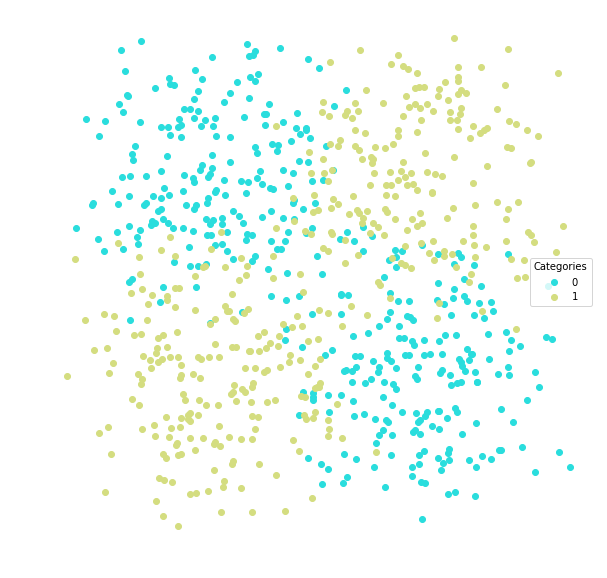

/Users/xiangyu/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [151]:
#show what the data set 6 looks like (this is essentially data set 3, but with more noise):
lucem_illud.plotter(dfTrain6)
xyFit(dfTrain6)

               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.864646           0.814957       0.135   0.873684  0.846939
1         0.864646           0.816303       0.135   0.857143  0.882353


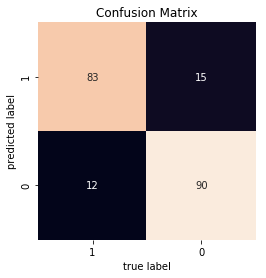

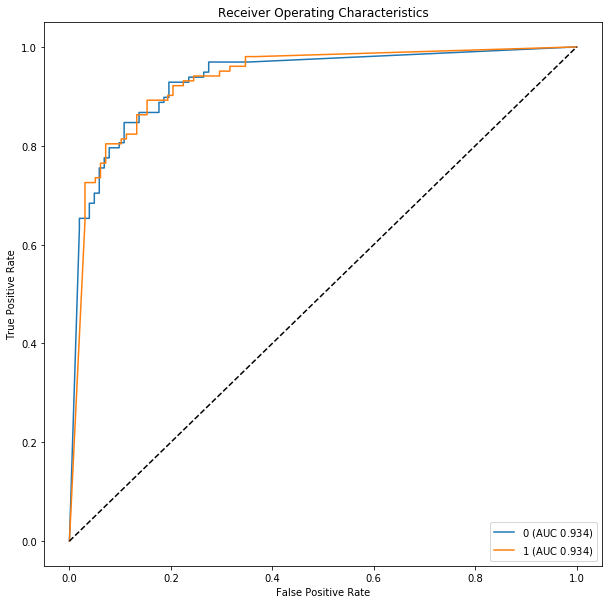

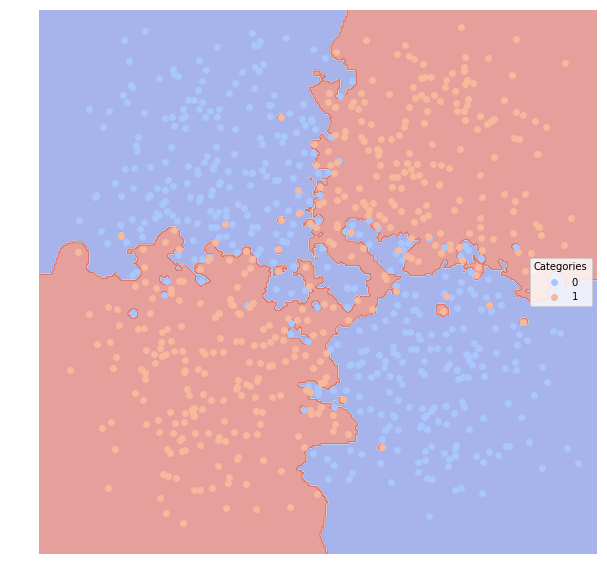

In [162]:
xyEva(knclf, dfTrain6, dfTest6)

Similar results to data set 3: svm/bayes performed really badly, everything else was good.

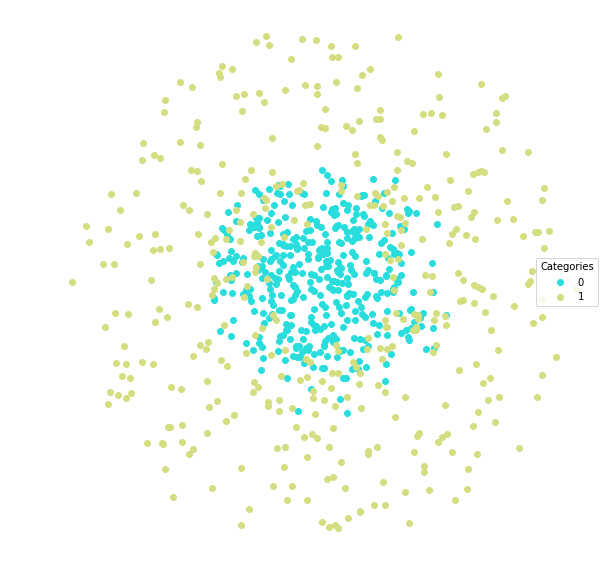

/Users/xiangyu/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [163]:
#show what the data set 6 looks like (data set 4 with more noise):
lucem_illud.plotter(dfTrain7)
xyFit(dfTrain7)

               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.851362           0.778658        0.15   0.817308  0.885417
1         0.851362           0.818658        0.15   0.885417  0.817308


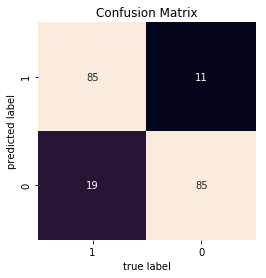

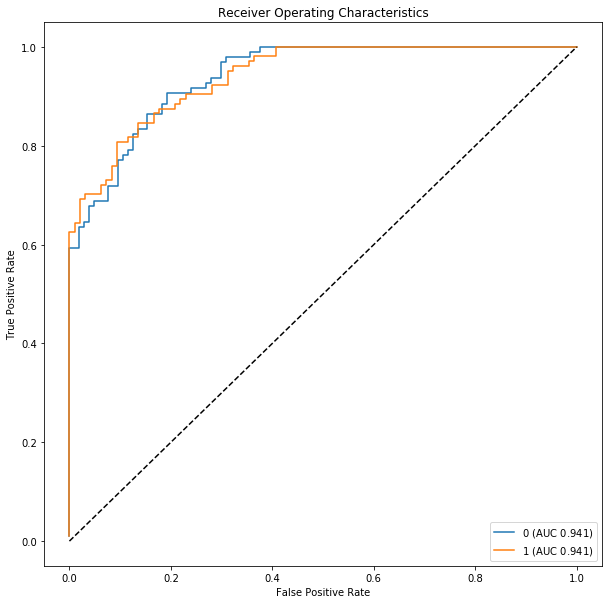

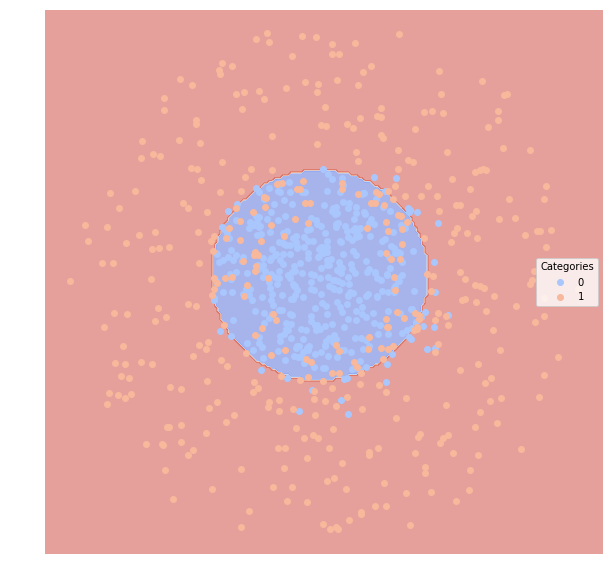

In [177]:
xyEva(nbclf, dfTrain7, dfTest7)

Everything performed worse because of the added noise. SVM remains the worst performer.

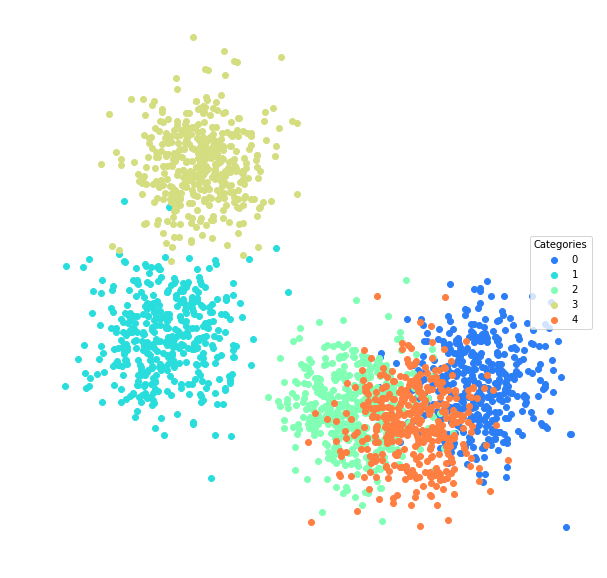

In [178]:
#show what the data set 8 looks like, multiblobs with more noise:
lucem_illud.plotter(dfTrain8)
xyFit(dfTrain8)

               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.887749           0.676183       0.080   0.771429  0.835052
1         0.987643           0.938450       0.014   0.945455  0.990476
2         0.786314           0.477890       0.130   0.634409  0.655556
3         0.969332           0.943474       0.014   0.989691  0.941176
4         0.684728           0.368292       0.198   0.536842  0.481132


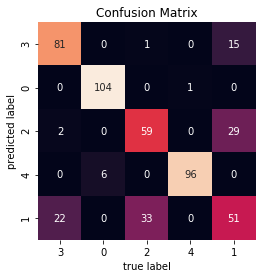

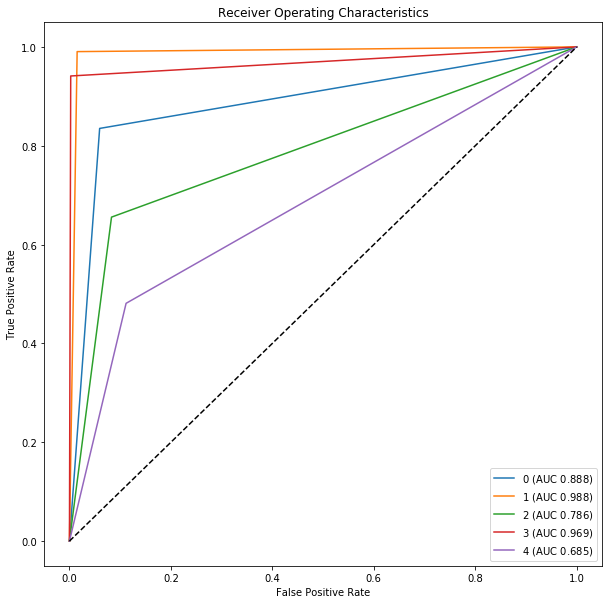

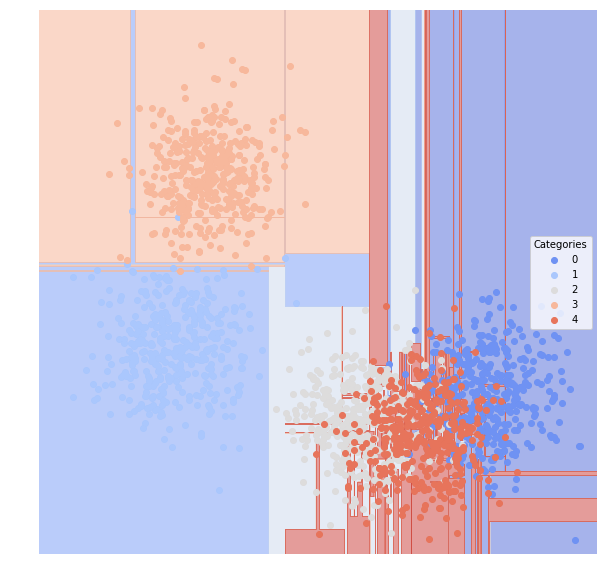

In [184]:
xyEva(dtclf,dfTrain8, dfTest8)

Everything seemed to perform well — K-nearest neighbors, and Decision Tree Random Forest didn't seem to do well. Not sure why.

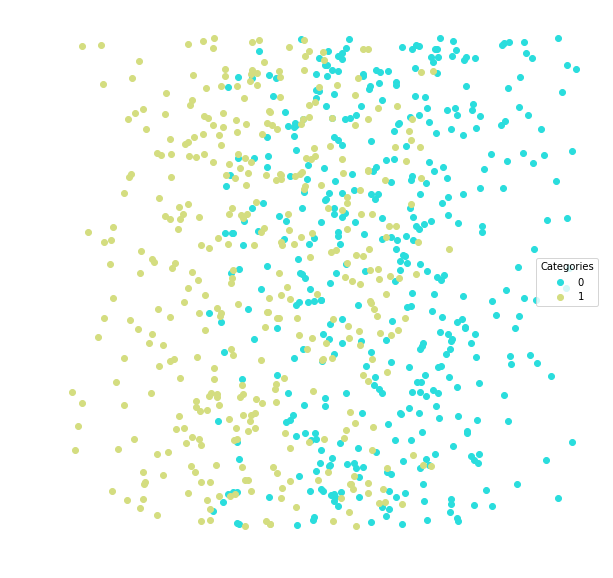

In [185]:
#show what the data set 9 looks like, dset2 with more noise:
lucem_illud.plotter(dfTrain9)
xyFit(dfTrain9)

               AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                              
0         0.705665           0.574529        0.29   0.647727  0.678571
1         0.705665           0.711111        0.29   0.758929  0.732759


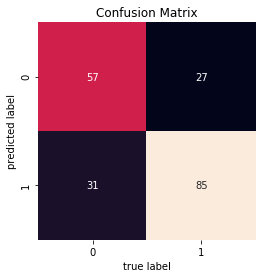

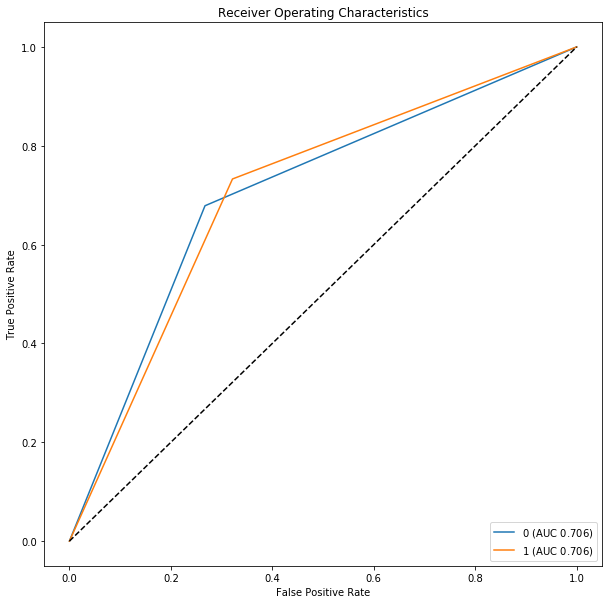

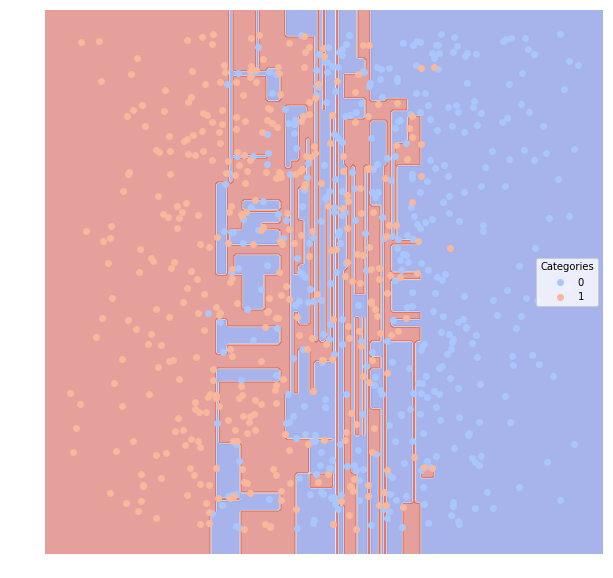

In [193]:
xyEva(dtclf, dfTrain9, dfTest9)

Neural nets and K-neighbors performed the best.

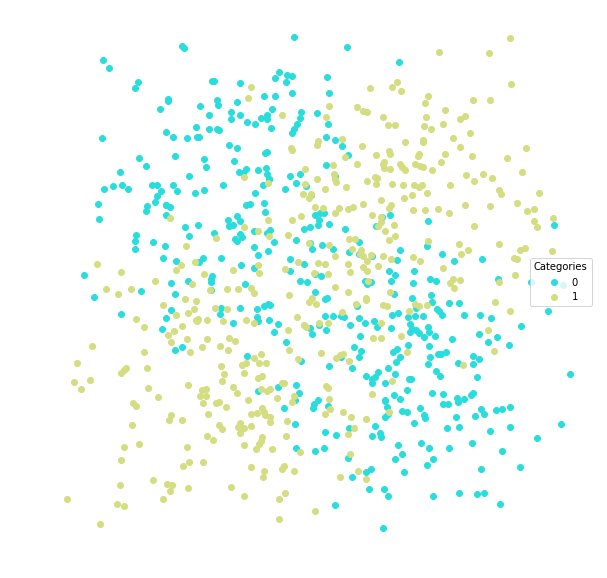

In [194]:
#show what the data set 10 looks like:
lucem_illud.plotter(dfTrain0)
xyFit(dfTrain0)

              AUC  Average_Precision  Error_Rate  Precision    Recall
Category                                                             
0         0.78891           0.723716        0.21   0.802198  0.752577
1         0.78891           0.733538        0.21   0.779817  0.825243


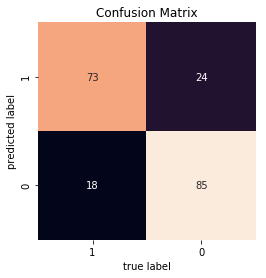

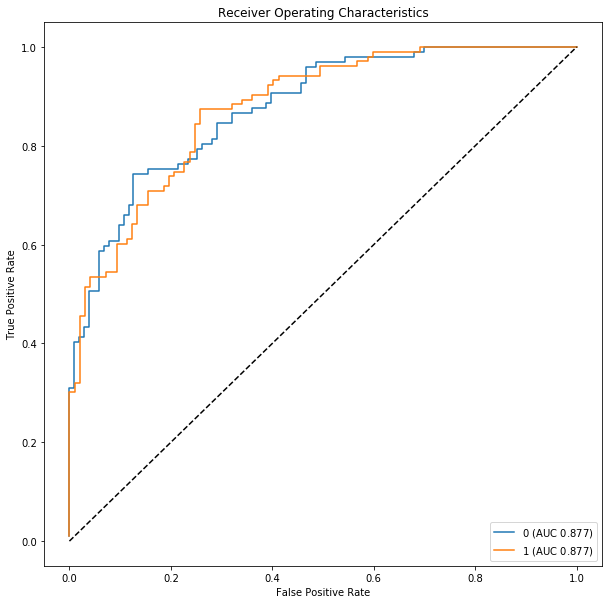

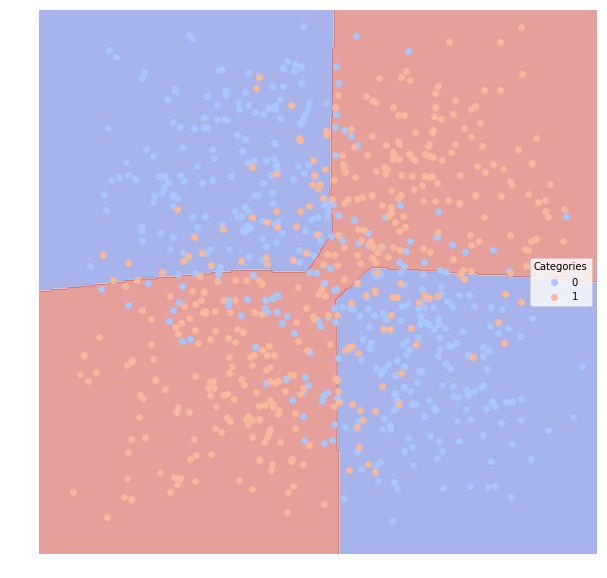

In [203]:
xyEva(nnclf, dfTrain0, dfTest0)

Neural net performed the best. The linear models like logistic regression/SVM/NB did not perform well.

In [204]:
#load data
dfTraina, dfTesta = lucem_illud.trainTestSplit(lucem_illud.loadReddit())
dfTrainb, dfTestb = lucem_illud.trainTestSplit(lucem_illud.loadNewsGroups())
dfTrainc, dfTestc = lucem_illud.trainTestSplit(lucem_illud.loadSenateSmall())
dfTraind, dfTestd = lucem_illud.trainTestSplit(lucem_illud.loadSenateLarge())
dfTraine, dfTeste = lucem_illud.trainTestSplit(lucem_illud.loadSpam())

Loading Reddit data
Converting to vectors
Loading data for: comp.sys.mac.hardware
Loading data for: comp.windows.x
Loading data for: misc.forsale
Loading data for: rec.autos
Converting to vectors
Loading senate data
Converting to vectors
Loading senator: Klobuchar
Loading senator: Kyl
Loading senator: Kerry
Loading senator: Kohl
Loading senator: Kennedy
Converting to vectors
Loading Spam
Loading Ham
Converting to vectors


In [205]:
# fit reddit data
xyFit(dfTraina)

                              AUC  Average_Precision  Error_Rate  Precision  \
Category                                                                      
Relationships            0.967186           0.920827    0.021944   0.959459   
Tales From Tech Support  0.980972           0.964590    0.012539   0.988506   
Weeaboo Tales            0.993976           0.991087    0.003135   1.000000   
Bad Roommates            0.982934           0.924370    0.018809   0.934211   

                           Recall  
Category                           
Relationships            0.946667  
Tales From Tech Support  0.966292  
Weeaboo Tales            0.987952  
Bad Roommates            0.986111  


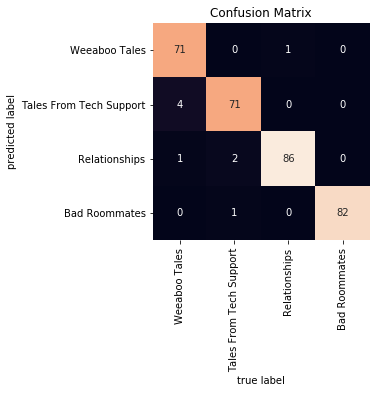

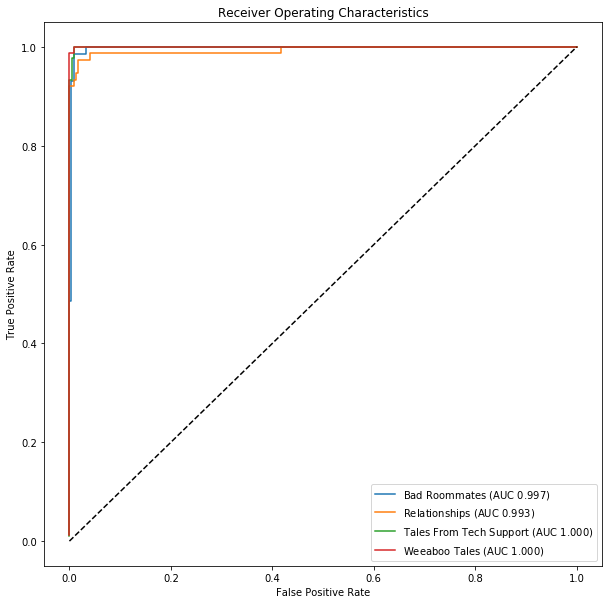

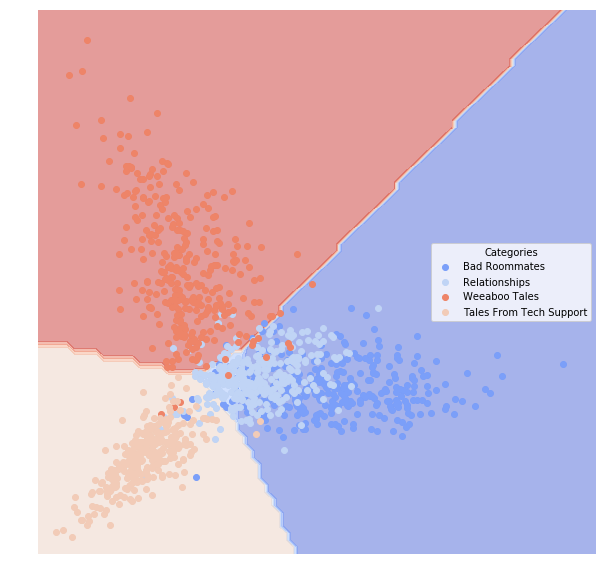

In [213]:
xyEva(svmclf, dfTraina, dfTesta)

Logistic Regression and SVM perform exceedingly well for the Reddit data, although all the algorithms bar naive bayes perform capably.

In [214]:
#newsgroup data
xyFit(dfTrainb)

                            AUC  Average_Precision  Error_Rate  Precision  \
Category                                                                    
misc.forsale           0.815940           0.592413    0.123404   0.745098   
rec.autos              0.872624           0.743226    0.091489   0.865546   
comp.windows.x         0.928864           0.831524    0.051064   0.904348   
comp.sys.mac.hardware  0.835089           0.588442    0.142553   0.679104   

                         Recall  
Category                         
misc.forsale           0.703704  
rec.autos              0.792308  
comp.windows.x         0.888889  
comp.sys.mac.hardware  0.791304  


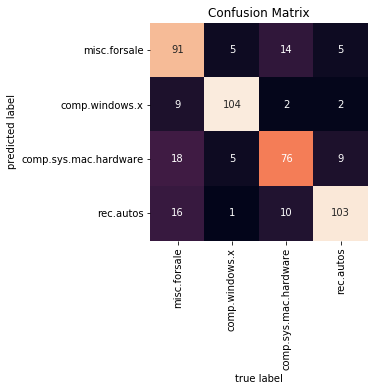

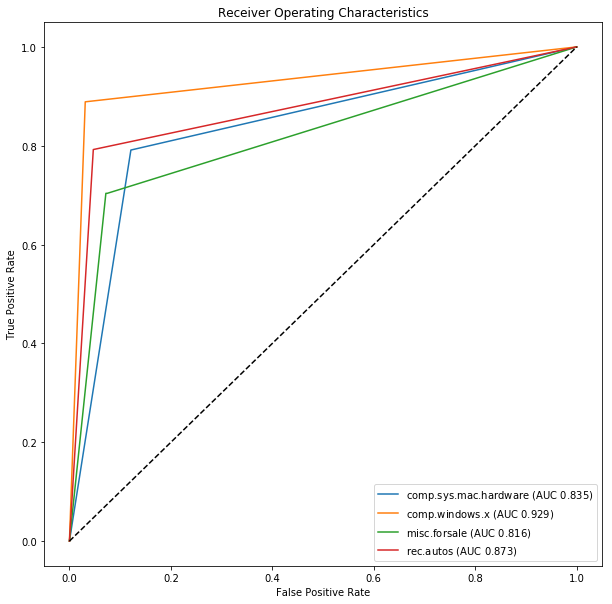

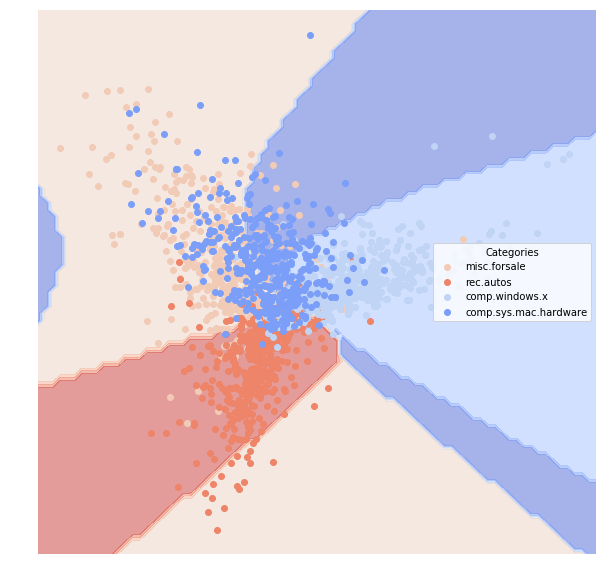

In [223]:
xyEva(nbclf, dfTrainb, dfTestb)

Everything seems to do well?

In [283]:
# try out a new classifier: the Gaussian Process Classifier
import sklearn.gaussian_process
gpclf = sklearn.gaussian_process.GaussianProcessClassifier

ValueError: setting an array element with a sequence.

# Clinton / Obama Press Releases

We often will not have nicely prepared data, so we will work though the proccess of cleaning and structuring in more detail here:

While the Clinton and Obama Senatorial Press Releases are not hand-coded, we can imagine that we have been given a stack of such press releases, but lost the metadata associated with which senatorial office issued which. If we label a few of them, how well can our classifier do at recovering the rest? 

In [261]:
ObamaClintonReleases = pandas.read_csv('../data/ObamaClintonReleases.csv', index_col=0)

Let's turn the 'targetSenator' column into a binary category variable.

In [262]:
ObamaClintonReleases['category'] = [s == 'Obama' for s in ObamaClintonReleases['targetSenator']]

Tokenize and normalize

In [263]:
ObamaClintonReleases['tokenized_text'] = ObamaClintonReleases['text'].apply(lambda x: nltk.word_tokenize(x))
ObamaClintonReleases['normalized_text'] = ObamaClintonReleases['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x, stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic))

Let's split the data into training data and testing data.

In [339]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud.trainTestSplit(ObamaClintonReleases, holdBackFraction=holdBackFraction)

In [240]:
print(len(train_data_df))
print(len(test_data_df))

1368
341


## Logistic Regression

First, let's try with a logistic regression, which may be familiar to you from statistical methods classes. First, we must turn the training dataset into a tf-idf matrix (`lucem_illud.generateVecs()` will help with this but for now we are doing it the long way):

In [241]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])

In [331]:
train_data_df

,download_url,html_url,name,path,text,targetSenator,category,tokenized_text,normalized_text,vect,pca,pca_reduced_10,pca_reduced_40,pca_reduced_100,pca_reduced_200,pca_reduced_400
63,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,13Jun2008Obama58.txt,raw/Obama/13Jun2008Obama58.txt,Durbin Obama and Illinois Delegation Membe...,Obama,True,"[Durbin, Obama, and, Illinois, Delegation, Mem...","[durbin, obama, illinoi, deleg, member, reques...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.061412598146739224, -0.14468761364516014, ...","[-0.061412598146739224, -0.14468761364516014, ...","[-0.061412598146739224, -0.14468761364516014, ...","[-0.061412598146739224, -0.14468761364516014, ...","[-0.061412598146739224, -0.14468761364516014, ...","[-0.061412598146739224, -0.14468761364516014, ..."
276,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,20Jun2007Obama365.txt,raw/Obama/20Jun2007Obama365.txt,Obama Calls for Passage of Employee Free Ch...,Obama,True,"[Obama, Calls, for, Passage, of, Employee, Fre...","[obama, call, passag, employe, free, choic, ac...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.011574639894290728, -0.002264295655605241,...","[-0.011574639894290728, -0.002264295655605241,...","[-0.011574639894290728, -0.002264295655605241,...","[-0.011574639894290728, -0.002264295655605241,...","[-0.011574639894290728, -0.002264295655605241,...","[-0.011574639894290728, -0.002264295655605241,..."
1563,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,19Dec2007Clinton40.txt,raw/Clinton/19Dec2007Clinton40.txt,December 19 2007 Statement of Senator Clinton...,Clinton,False,"[December, 19, 2007, Statement, of, Senator, C...","[decemb, statement, senat, clinton, senat, app...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.014115724457399713, -0.022555265954205456, ...","[0.014115724457399713, -0.022555265954205456, ...","[0.014115724457399713, -0.022555265954205456, ...","[0.014115724457399713, -0.022555265954205456, ...","[0.014115724457399713, -0.022555265954205456, ...","[0.014115724457399713, -0.022555265954205456, ..."
1271,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,16Jan2006Clinton703.txt,raw/Clinton/16Jan2006Clinton703.txt,January 16 2006 Statement of Senator Hillary ...,Clinton,False,"[January, 16, 2006, Statement, of, Senator, Hi...","[januari, statement, senat, hillari, rodham, c...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.007124654851015735, -0.017953154084585372, ...","[0.007124654851015735, -0.017953154084585372, ...","[0.007124654851015735, -0.017953154084585372, ...","[0.007124654851015735, -0.017953154084585372, ...","[0.007124654851015735, -0.017953154084585372, ...","[0.007124654851015735, -0.017953154084585372, ..."
1207,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,15May2006Clinton509.txt,raw/Clinton/15May2006Clinton509.txt,May 15 2006 Senator Clinton Joins Bipartisan ...,Clinton,False,"[May, 15, 2006, Senator, Clinton, Joins, Bipar...","[may, senat, clinton, join, bipartisan, push, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.02610158540774638, -0.0256360980556273, -0...","[-0.02610158540774638, -0.0256360980556273, -0...","[-0.02610158540774638, -0.0256360980556273, -0...","[-0.02610158540774638, -0.0256360980556273, -0...","[-0.02610158540774638, -0.0256360980556273, -0...","[-0.02610158540774638, -0.0256360980556273, -0..."
82,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,13Sep2006Obama500.txt,raw/Obama/13Sep2006Obama500.txt,Obama Statement on the 5th Anniversary of t...,Obama,True,"[Obama, Statement, on, the, 5th, Anniversary, ...","[obama, statement, anniversari, septemb, attac...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",

Note that we can use the CountVectorizer instead, which simply produces a matrix of word counts.

In [242]:
TFVects.shape

(1368, 11519)

We can save this in the dataframe to make things easier

In [291]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In a regression, we cannot have more variables than cases. So, we need to first do a dimension reduction. First, we will approah this with PCA. You have previously seen this in week 3. Here we are not concerned about visualization, but rather classification and so all principal components are calculated. Watch out: we have to use `stack` not `sum` for combining the vectors. We note that you could also use topic loading and embedding dimensions as featured variables.

In [292]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

We can store the PCA space vectors in the dataframe too:

In [293]:
train_data_df['pca'] = [r for r in reduced_data]

Visualization in 2D:

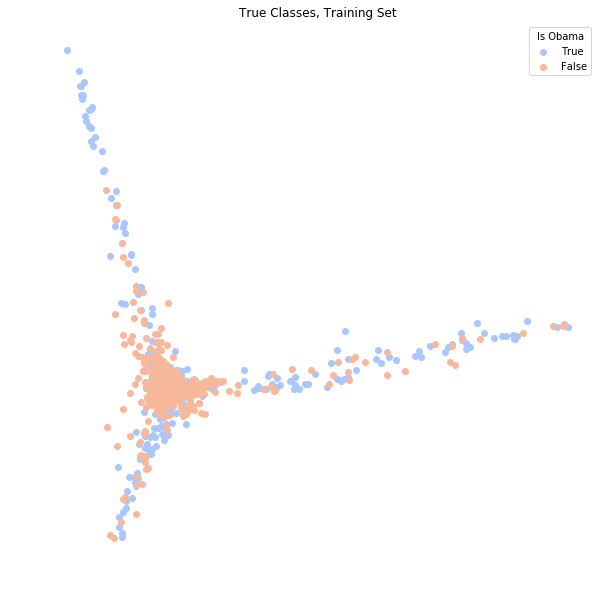

In [294]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Obama
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot not Obama
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Obama')
plt.title('True Classes, Training Set')
plt.show()

PCA cannot distinguish Obama very well. Let's perform a screeplot to see how many Principal Components we need.

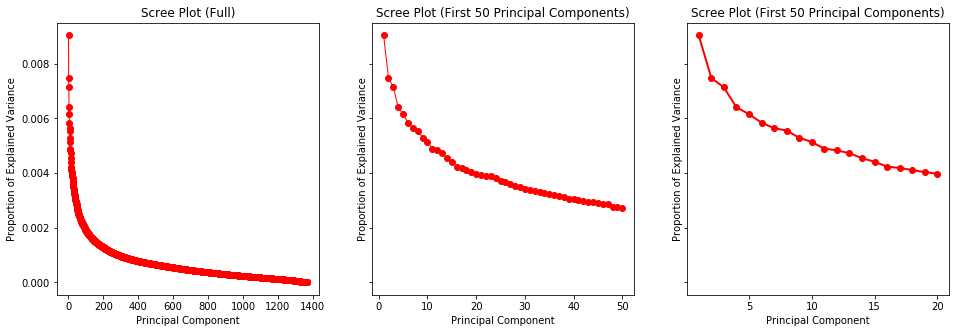

In [295]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

Let's choose the first 10 pricipal components as our covariates.

In [296]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

Now we fit a logistic regression to our data.

In [297]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Let's see how the logistic regression performs on the training dataset from which we develop the model. Unfortunately, the mean accuracy is only about 64%.

In [298]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.6542397660818714

How does it perform on the testing dataset, which we "held out" and did not use for model training? We need to repeat all the steps on the testing data, but without retraining:

In [299]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

0.6656891495601173

Slightly poorer. How about using more dimensions (40)?

In [300]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['category']))

Training:
0.7463450292397661
Testing:
0.7331378299120235


Or still more (100)?

In [301]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['category']))

Training:
0.8369883040935673
Testing:
0.7653958944281525


Or even more (200)!

In [302]:
train_data_df['pca_reduced_200'] = train_data_df['pca'].apply(lambda x: x[:200])
test_data_df['pca_reduced_200'] = test_data_df['pca'].apply(lambda x: x[:200])

logistic.fit(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_200'], axis=0), test_data_df['category']))

Training:
0.875
Testing:
0.7976539589442815


This is becoming ridiculous (400)!

In [303]:
train_data_df['pca_reduced_400'] = train_data_df['pca'].apply(lambda x: x[:400])
test_data_df['pca_reduced_400'] = test_data_df['pca'].apply(lambda x: x[:400])

logistic.fit(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_400'], axis=0), test_data_df['category']))

Training:
0.9115497076023392
Testing:
0.8005865102639296


Increasing the number of covariates would overfit our data, and it seems that using a logistic regression, our prediction accuracy is at best about 65%. We can, however, try a logistic regression that uses the TF-IDF scores for each word, but with an L1 regularization or L1-norm loss function, which is also known as least absolute deviations (LAD), least absolute errors (LAE) or L1 penalty. It minimizes the sum of the absolute differences (S) between the target value ($Y_i$) and the estimated values ($f(x_i)$) and prunes all insignificant variables (i.e., word TF-IDF scores):

$S=\sum^n_{i=1}|y_i=f(x_i)|$

The result is a model retaining only the most individually significant features.

In [304]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l1')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.8494152046783626


Train the model using training data, and then test it on the testing data.

In [305]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.8181818181818182


81% accuracy seems like the best we can get by using a logistic regression.

Now let's try with Naive Bayes. Classically, it is trained with word counts, but TF-IDF vectors are also quite good:

In [386]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

KeyError: 'vect'

In [ ]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

A bit better than the logit, but that's just looking at the accuracy. What about other measures? Let's first save the predictions in the dataframe to save use rerunning the model every time:

In [ ]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

Precision:

In [ ]:
sklearn.metrics.precision_score(test_data_df['nb_predict'], test_data_df['category'])

Recall:

In [ ]:
sklearn.metrics.recall_score(test_data_df['nb_predict'], test_data_df['category'])

F1-measure:

In [312]:
sklearn.metrics.f1_score(test_data_df['nb_predict'], test_data_df['category'])

0.8145454545454545

Let's take a look at how well our posterior distribution looks relative to the truth.

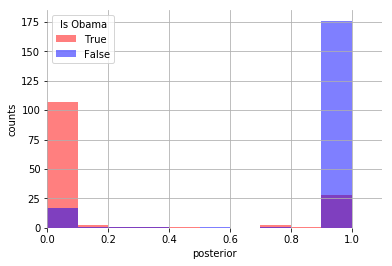

In [313]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
test_data_df[test_data_df['category'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Is Obama")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

The classification is suprisingly accurate. We can even look at what words are most influential with a bit of simple math:

In [314]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'Obama' : [],
    'Obama_log_prob' : [],
    'Clinton' : [],
    'Clinton_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Obama'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Obama_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Clinton'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Clinton_log_prob'].append(prob)
    
pandas.DataFrame(words_dict)

,Clinton,Clinton_log_prob,Obama,Obama_log_prob
0,5566,-1.736951,welcomed,-2.282880
1,amy,-1.809522,fy,-2.295150
2,dick,-1.853485,announcement,-2.320151
3,brundage,-1.911305,construction,-2.412933
4,chicago,-2.011388,entire,-2.412933
5,temporary,-2.183238,environment,-2.412933
6,va,-2.214987,urban,-2.412933
7,location,-2.247777,urged,-2.412933
8,cases,-2.299070,created,-2.426919
9,quickly,-2.299070,panel,-2.441104


## Multinomial Naive Bayes

What if we want to classify our text into one of *many* classes? The multinomial Naive Bayes generating model assumes that document features (e.g., words) are generated by draws from a multinomial distribution (recall this gives the probability to observe a particular pattern of counts across features). 

Let's use again the dataset we used in week 3, the 20 newsgroup dataset.

In [361]:
newsgroups = sklearn.datasets.fetch_20newsgroups(data_home = '../data') #Free data to play with: documents from a newsgroup corpus.
newsgroups.target_names #Possible categories, i.e., the newsgroups

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

We can pick specific categories, and pull the relevant training and testing sets. 

In [362]:
target_categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics'] #Can change these of course

newsgroupsDF = pandas.DataFrame(columns = ['text', 'category', 'source_file'])
for category in target_categories:
    print("Loading data for: {}".format(category))
    ng = sklearn.datasets.fetch_20newsgroups(categories = [category], remove=['headers', 'footers', 'quotes'], data_home = '../data')
    newsgroupsDF = newsgroupsDF.append(pandas.DataFrame({'text' : ng.data, 'category' : [category] * len(ng.data), 'source_file' : ng.filenames}), ignore_index=True)

Loading data for: talk.religion.misc
Loading data for: soc.religion.christian
Loading data for: sci.space
Loading data for: comp.graphics


Now we need to tokenize, and make a training and testing set:

In [363]:
newsgroupsDF['tokenized_text'] = newsgroupsDF['text'].apply(lambda x: nltk.word_tokenize(x))
newsgroupsDF['normalized_text'] = newsgroupsDF['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x, stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic))

In [364]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

In [365]:
print(len(train_ng_df))
print(len(test_ng_df))

1723
430


We need to extract features from the text. We can use built-in feature extraction to do so. We will use a tf-idf vectorizer, which converts the document into a vector of words with tf-idf weights (term-frequency inverse-document frequency). This gives high weight to words that show up a lot in a given document, but rarely across documents in the corpus (more distinctive). 

In [366]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

Now we can train the model:

In [367]:
MultinomialNB_ng = sklearn.naive_bayes.MultinomialNB()
MultinomialNB_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

...and save predictions to the dataframe:

In [368]:
train_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(MultinomialNB_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

Training score:
0.8966918165989554


In [369]:
train_ng_df[['category', 'nb_predict']][:10]

,category,nb_predict
1563,sci.space,sci.space
1214,sci.space,sci.space
1446,sci.space,sci.space
1097,sci.space,sci.space
1504,sci.space,soc.religion.christian
1720,comp.graphics,comp.graphics
1971,comp.graphics,comp.graphics
665,soc.religion.christian,soc.religion.christian
445,soc.religion.christian,soc.religion.christian
1714,comp.graphics,comp.graphics


Looks pretty good, lets examine the testing dataset:

In [370]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(MultinomialNB_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.786046511627907


We can even use a confusion matrix, like we used last week for evaluating human coders relative to one another. Now we are evaluating our classifier relative to human coding. We'll just use the one in `lucem_illud`, which requres a classifier and a dataframe with `'vect'` and `'category'` columns, like we have in the examples:

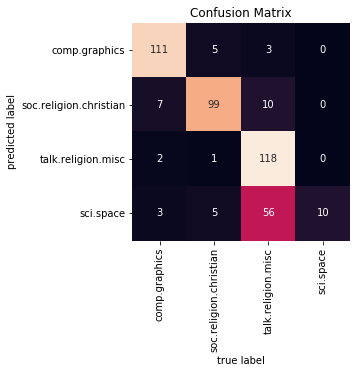

In [371]:
lucem_illud.plotConfusionMatrix(MultinomialNB_ng, test_ng_df)

Let's calculate the precision, recall, and F-measures.

In [372]:
print(sklearn.metrics.precision_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #recall
print(sklearn.metrics.f1_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #F-1 measure

0.9123846290623026
0.786046511627907
0.8252861833172037


We can evaluate these per catagory. This has the same requiments as `plotConfusionMatrix`:

In [373]:
lucem_illud.metrics.evaluateClassifier(MultinomialNB_ng, test_ng_df)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
comp.graphics,0.947094,0.860376,0.046512,0.902439,0.932773
sci.space,0.909208,0.807638,0.065116,0.900000,0.853448
talk.religion.misc,0.567568,0.283972,0.148837,1.000000,0.135135
soc.religion.christian,0.875953,0.622348,0.167442,0.631016,0.975207


We can also plot the ROC curves. This has the same requiments as `plotConfusionMatrix`:

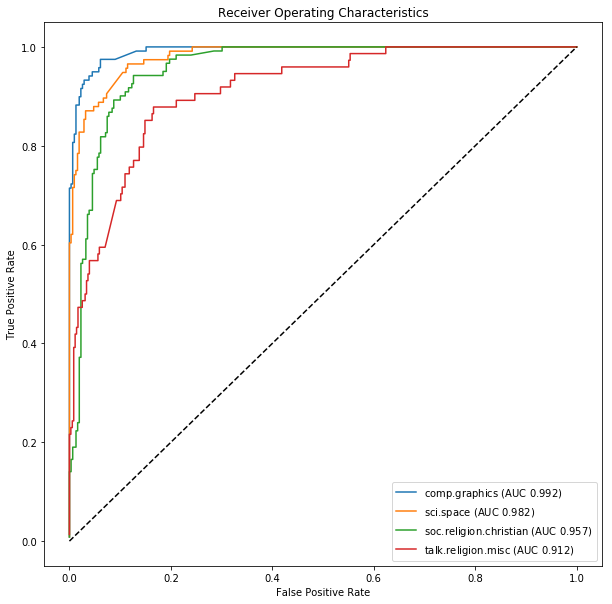

In [374]:
lucem_illud.plotMultiROC(MultinomialNB_ng, test_ng_df)

And we can plot the PCA space visualization:

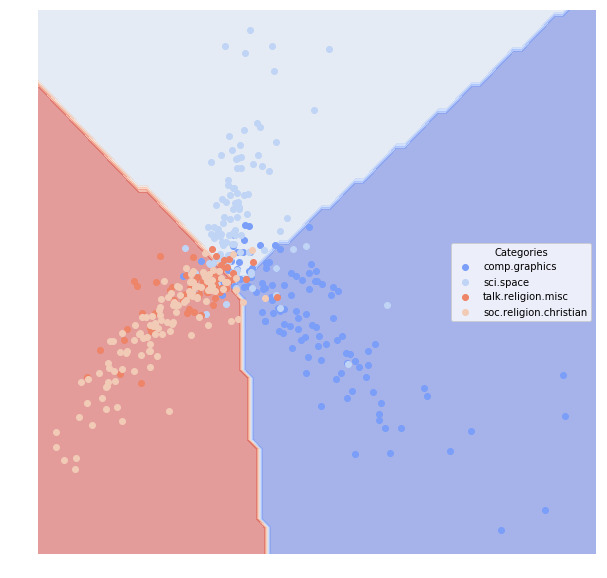

In [375]:
lucem_illud.plotregions(MultinomialNB_ng, test_ng_df)

We can also give the model a new string, not present in our data, and use the *predict* method to see if it can assign it to a category. Using our model to extend its classifications to new, uncoded data might be the primary purpose of a social science application. The words do have to be in the vocabulary, so don't be too creative :-)

In [376]:
def predict_category(s, model, tfidf): #We just define a simple function here
    a = np.zeros((1, len(tfidf.vocabulary_)))
    for w in nltk.word_tokenize(s):
        try:
            a[:,tfidf.vocabulary_[lucem_illud.stemmer_basic.stem(w.lower())]] = 1
        except KeyError:
            print("Warning: '{}' not in vocabulary".format(w))
    return model.predict(a)[0]

In [377]:
predict_category('rockets are cool', MultinomialNB_ng, TFVectorizer_ng)

'sci.space'

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


In [324]:
#load the data & label the data
stbtDF = pandas.read_csv("meritSTBT.csv")
stbtDF['tokenized_sents'] = stbtDF['text'].apply(lambda x: [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
stbtDF['normalized_sents'] = stbtDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s, stopwordLst = lucem_illud.stop_words_basic) for s in x])

In [325]:
tocDF = pandas.read_excel('meritTOC.xlsx')

In [326]:
tocDF['tokenized_sents'] = tocDF['text'].apply(lambda x: [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
tocDF['normalized_sents'] = tocDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s, stopwordLst = lucem_illud.stop_words_basic) for s in x])

In [335]:
# True for articles from state media, False for articles from non-state media
stbtDF['cat'] = True
tocDF['cat'] = False

In [343]:
#produce combined df
combDF = pandas.concat([stbtDF,tocDF])
combDF = combDF.reset_index()

In [344]:
#split into training and test data
holdBackFraction = .2
xytrain_data_df, xytest_data_df = lucem_illud.trainTestSplit(combDF, holdBackFraction)

In [347]:
#prepare and vectorize the data
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
xyTFVects = TFVectorizer.fit_transform(xytrain_data_df['text'])

xytrain_data_df['vect'] = [np.array(v).flatten() for v in xyTFVects.todense()]

pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(xytrain_data_df['vect'], axis=0))

xytrain_data_df['pca'] = [r for r in reduced_data]

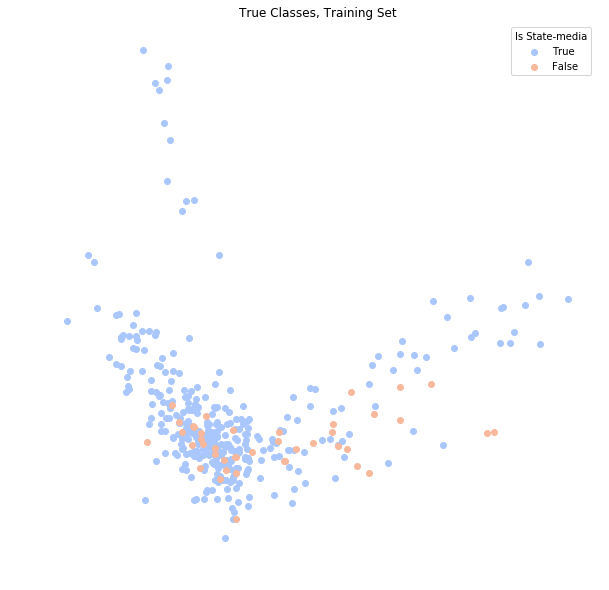

In [350]:
# visualize
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot state 
a = np.stack(xytrain_data_df[xytrain_data_df['cat']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot non-state
a = np.stack(xytrain_data_df[xytrain_data_df['cat'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is State-media')
plt.title('True Classes, Training Set')
plt.show()


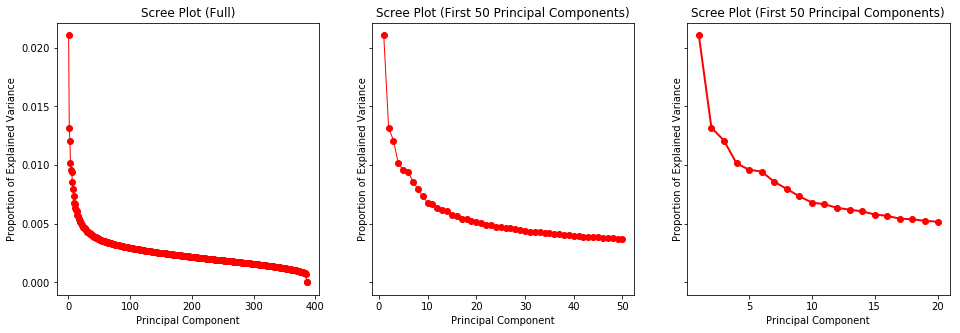

In [352]:
n = len(xytrain_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

Massive elbow at about 5, so I'd use that as the no. of components if I were to do this manually. Going off of the example though, it seems that L1 regularization is the preferred method. So let's do that instead.

In [354]:
# LR with L-1 regularization

logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l1')
logistic_l1.fit(np.stack(xytrain_data_df['vect'], axis=0), xytrain_data_df['cat'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [388]:
#prepare test data
TFVects_test = TFVectorizer.transform(xytest_data_df['text'])
xytest_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

In [389]:
# test on test data
print(logistic_l1.score(np.stack(xytest_data_df['vect'], axis=0), xytest_data_df['cat']))

0.9270833333333334


In [390]:
#now use naive bayes
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(xytrain_data_df['vect'], axis=0), xytrain_data_df['cat'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [391]:
print("Training:")
print(naiveBayes.score(np.stack(xytrain_data_df['vect'], axis=0), xytrain_data_df['cat']))
print("Testing:")
print(naiveBayes.score(np.stack(xytest_data_df['vect'], axis=0), xytest_data_df['cat']))

Training:
0.9328165374677002
Testing:
0.9375


In [394]:
xytest_data_df['nb_predict'] = naiveBayes.predict(np.stack(xytest_data_df['vect'], axis=0))
xytest_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(xytest_data_df['vect'], axis=0))[:,0] 

In [397]:
print('Precision: {}'.format(sklearn.metrics.precision_score(xytest_data_df['nb_predict'], xytest_data_df['cat'])))
print('Recall: {}'.format(sklearn.metrics.recall_score(xytest_data_df['nb_predict'], xytest_data_df['cat'])))
print('F1: {}'.format(sklearn.metrics.f1_score(xytest_data_df['nb_predict'], xytest_data_df['cat'])))

Precision: 1.0
Recall: 0.9368421052631579
F1: 0.967391304347826


# Decision Trees

Decision trees can be used to predict both categorical/class labels (i.e., classification) and continuous labels (i.e., regression).

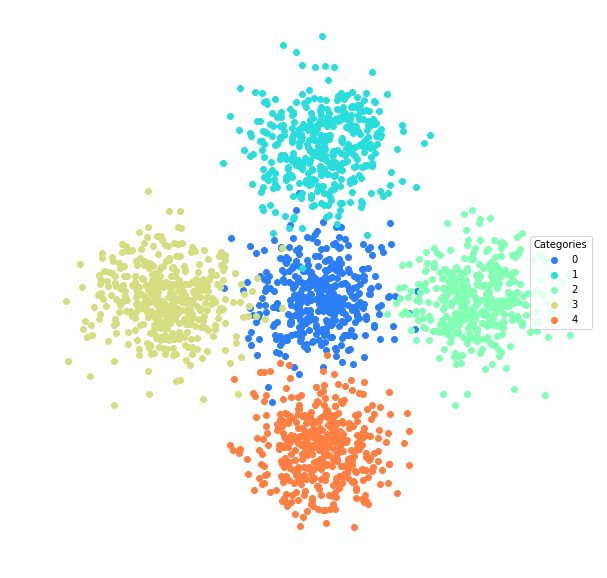

In [398]:
blobs_df = lucem_illud.multiBlobs(noise=.2, centers=[(0,0), (0,5), (5,0), (-5,0), (0,-5)])
df_exampleTree_train, df_exampleTree_test = lucem_illud.trainTestSplit(blobs_df)
lucem_illud.plotter(df_exampleTree_train)

Now we import our Decision Tree classifier from sklearn.tree (familiar syntax) and fit it using the fit method.

In [399]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

To see what's going on visually with the classification: 

In [414]:
df_exampleTree_train

,category,vect
1226,0,"[1.237275559391294, -0.6244711456316095]"
858,0,"[1.5182900305302949, 1.6874604102417352]"
1116,4,"[-0.6324196808790115, -6.175318655462592]"
2059,3,"[-6.630173086909689, -0.8009867828950755]"
334,3,"[-3.5688566096587695, 0.9425160980074582]"
2406,1,"[0.21456283864948214, 4.197819717533636]"
596,1,"[0.32735576546698625, 3.33407522071872]"
886,3,"[-3.7395092866620665, -0.1285618336367611]"
1774,3,"[-5.370874647122106, 0.4334381153773259]"
2353,0,"[-1.7805586609158157, 0.3700871413701396]"


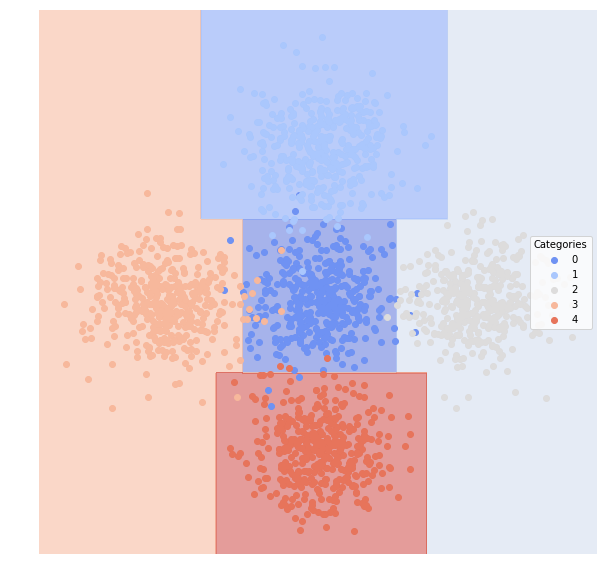

In [400]:
lucem_illud.plotregions(clf_tree, df_exampleTree_train)

In [401]:
lucem_illud.evaluateClassifier(clf_tree, df_exampleTree_test)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.955225,0.893380,0.026,0.950495,0.923077
1,0.990385,0.984769,0.004,1.000000,0.980769
2,0.988966,0.948030,0.012,0.954955,0.990654
3,0.985770,0.952355,0.010,0.968750,0.978947
4,0.993225,0.979901,0.004,0.988889,0.988889


Lets look at accuracy:

In [408]:
sklearn.metrics.accuracy_score(df_exampleTree_test['category'],clf_tree.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

0.972

What happens if we trim the tree?

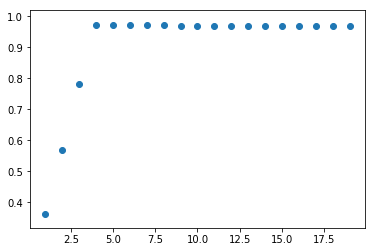

In [402]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])
    score = sklearn.metrics.accuracy_score(df_exampleTree_test['category'], tree2.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

We can select different layers of the decision tree or "prune" it. At approximately four layers down in the decision tree, the shape is somewhat odd, suggesting that our model is overfitting beyond those four layers.

Combining multiple overfitting estimators turns out to be a key idea in machine learning. This is called **bagging** and is a type of **ensemble** method. The idea is to make many randomized estimators--each can overfit, as decision trees are wont to do--but then to combine them, ultimately producing a better classification. A **random forest** is produced by bagging decision trees.

In [403]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [404]:
bag.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

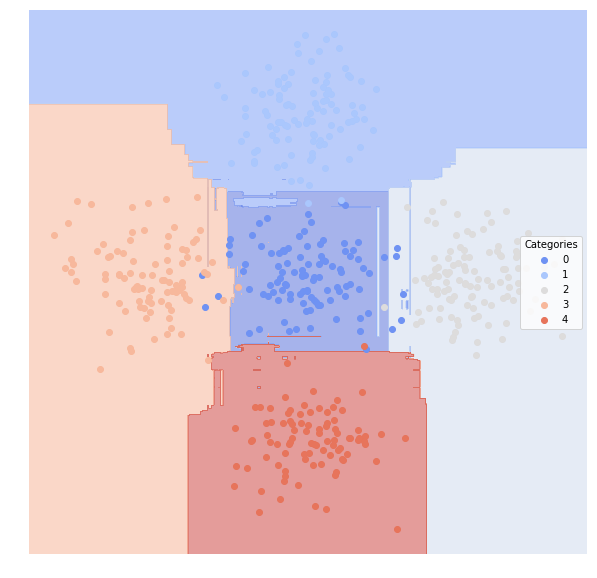

In [405]:
lucem_illud.plotregions(bag, df_exampleTree_test)

In [406]:
lucem_illud.evaluateClassifier(bag, df_exampleTree_test)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.955225,0.893380,0.026,0.950495,0.923077
1,0.990385,0.984769,0.004,1.000000,0.980769
2,0.988966,0.948030,0.012,0.954955,0.990654
3,0.991033,0.960871,0.008,0.969072,0.989474
4,0.994444,0.990889,0.002,1.000000,0.988889


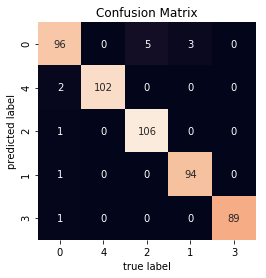

In [407]:
lucem_illud.plotConfusionMatrix(bag, df_exampleTree_test)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

In [410]:
# decision tree
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(xytrain_data_df['vect'], axis =0), xytrain_data_df['cat'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [422]:
xytrain_data_df.loc[:,['vect','cat']]

,vect,cat
236,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
372,"[0.027417039282907438, 0.0, 0.0, 0.0, 0.0, 0.0...",True
380,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
410,"[0.0, 0.0, 0.10756729973361866, 0.0, 0.0, 0.0,...",True
292,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
79,"[0.0, 0.0, 0.06000544483022849, 0.0, 0.0, 0.0,...",True
209,"[0.0, 0.0, 0.0, 0.05160045442006663, 0.0, 0.0,...",True
371,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.081...",True
179,"[0.03452457472644845, 0.0, 0.0, 0.0, 0.0, 0.0,...",True
476,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False


In [431]:
xytrain_data_df['category'] = xytrain_data_df['cat']
xytest_data_df['category'] = xytest_data_df['cat']

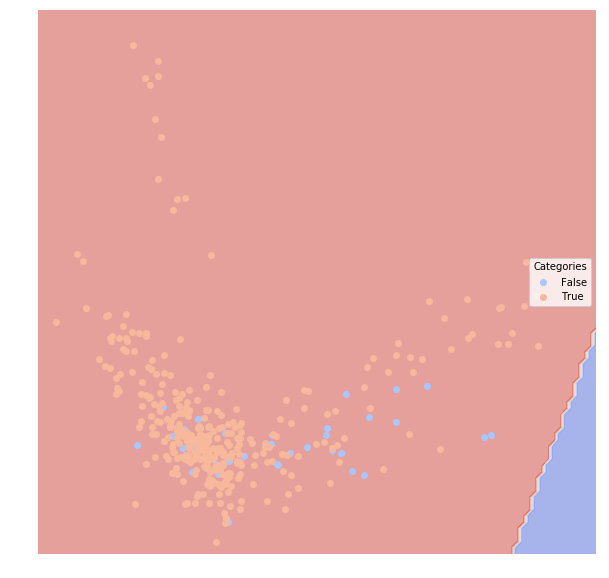

In [433]:
# visualize the model
lucem_illud.plotregions(clf_tree,xytrain_data_df.loc[:,['vect','category']])

In [429]:
# evaluate the model
lucem_illud.evaluateClassifier(clf_tree,xytrain_data_df.loc[:,['vect','category']])

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
False,0.738095,0.533038,0.056848,1.000000,0.47619
True,0.738095,0.940054,0.056848,0.940054,1.00000


In [440]:
xytrain_data_df

,index,Unnamed: 0,abstr,art_num,author,cat,date,normalized_sents,section,source,subj,text,title,tokenized_sents,url,vect,pca,category
236,236,236.0,"[...]India and Pakistan are enemies, while Sin...",237.0,NaN,True,"Aug 3, 2015\n","[[born, years, apart, pakistan, singapore, sha...",Opinion\n,The Straits Times; Singapore\n,Leadership\n,"Born 18 years apart in 1947 and 1965, Pakis...",A tale of two accidental nations: An indepe...,"[[Born, 18, years, apart, in, 1947, and, 1965,...",http://sfx.lib.uchicago.edu/sfx_local?url_ver...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.010639938210532546, -0.07791134769314378, ...",True
372,372,0.0,Robert Walters Singapore financial services di...,1.0,Emilyn Yap And\n,True,"May 24, 2012\n","[[singapore, fine, balancing, act, lies, ahead...",Top Stories\n,The Business Times; Singapore\n,Financial services; Private banking; Banks\n,[SINGAPORE] A fine balancing act lies ahead f...,"Bankers mull over Tharman's remarks, but mind...","[[[, SINGAPORE, ], A, fine, balancing, act, li...",http://sfx.lib.uchicago.edu/sfx_local?url_ver...,"[0.027417039282907438, 0.0, 0.0, 0.0, 0.0, 0.0...","[-0.16346542889098714, 0.16772765966864497, -0...",True
380,380,8.0,>Music Regina Spektor Live in Singapore: Russi...,9.0,NaN,True,"Dec 21, 2012\n","[[music, regina, spektor, live, singapore, art...",Executive Lifestyle\n,The Business Times; Singapore\n,Musicians & conductors\n,>Music\nRegina Spektor Live in Singapore: R...,Around Town\n,"[[>, Music, Regina, Spektor, Live, in, Singapo...",http://sfx.lib.uchicago.edu/sfx_local?url_ver...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.022138348514911334, -0.04420253007400861, ...",True
410,410,38.0,"Paul Evans, The Shell Chair Professor of Human...",39.0,NaN,True,"Jan 20, 2016\n","[[singapore, singapore, taken, spot, third, st...",Companies & Markets\n,The Business Times; Singapore\n,NaN,Singapore\nSINGAPORE has taken the No 2 spo...,Singapore retains No 2 spot in Global Talent ...,"[[Singapore, SINGAPORE, has, taken, the, No, 2...",http://sfx.lib.uchicago.edu/sfx_local?url_ver...,"[0.0, 0.0, 0.10756729973361866, 0.0, 0.0, 0.0,...","[-0.10190332712641671, 0.10225649074885769, -0...",True
292,292,292.0,Singapore has come a long way in building a na...,293.0,Chong Zi Liang\n,True,"Sep 5, 2016\n","[[singapore, come, long, way, building, nation...",Top Of The News\n,The Straits Times; Singapore\n,Elections; Presidents\n,Singapore has come a long way in building a...,Race still counts in politics and at the ball...,"[[Singapore, has, come, a, long, way, in, buil...",http://sfx.lib.uchicago.edu/sfx_local?url_ver...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.3201779912752458, 0.09623832187685688, -0.1...",True
79,79,79.0,"THE phrase ""unhealthy foreign cultural trends ...",80.0,NaN,True,"May 21, 2013\n","[[phrase, unhealthy, foreign, cultural, trends...",Forum Letters\n,The Straits Times; Singapore\n,Web sites; Values\n,"THE phrase ""unhealthy foreign cultural tren...",Rich values have ensured S'pore's progress\n,"[[THE, phrase, ``, unhealthy, foreign, cultura...",http://sfx.lib.uchicago.edu/sfx_local?url_ver...,"[0.0, 0.0, 0.06000544483022849, 0.0, 0.0, 0.0,...","[-0.022600051702648928, -0.05966870506584909, ...",True
209,209,209.0,While there are 40 female business owners for ...,210.0,NaN,True,"Apr 7, 2015\n","[[latest, numbers, point, narrowing, singapore...",Opinion\n,The Straits Times; Singapore\n,Gender\n,THE latest numbers that point to a narrowin...,Closing gender gap: Still a work in progress\n,"[[THE, latest, numbers, that, point, to, a, na...",http://sfx.lib.uchicago.edu/sfx_local?url_ver...,"[0.0, 0.0, 0.0, 0.05160045442006663, 0.0, 0.0,...","[-0.08729938927393012, 0.33234269346179646, 0....",True
371,371,371.0,None available.\n,372.0,"Chua, Mui Hoong\n",True,"Feb 1, 2018\n","[[trust, perennial, issue, news, recent, weeks...",Opinion\n,The Straits Times; Singapore\n,Social networks; Trust; Political leadership;...,Trust - that 

In [430]:
# evaluate accuracy
sklearn.metrics.accuracy_score(xytest_data_df['cat'],clf_tree.predict(np.stack(xytest_data_df['vect'], axis = 0)))

0.9375

In [434]:
# random forest model
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10)
bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag.fit(np.stack(xytrain_data_df['vect'], axis =0), xytrain_data_df['category'])

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

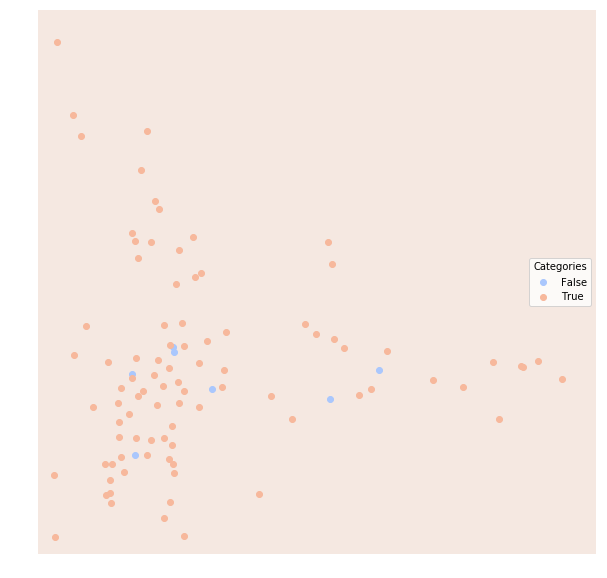

In [436]:
# visualize the model
lucem_illud.plotregions(bag,xytest_data_df.loc[:,['vect','category']])

/Users/xiangyu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


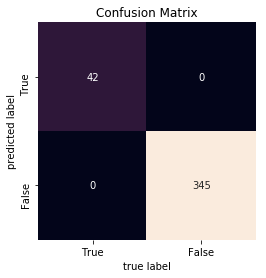

In [439]:
lucem_illud.evaluateClassifier(bag, xytest_data_df.loc[:,['vect','category']])
lucem_illud.plotConfusionMatrix(bag, xytest_data_df.loc[:,['vect','category']])

The random forest model is way overfitted. It just assigns all non-state articles in my test set as state articles.

# K-Nearest Neighbors

The K-Nearest neighbors classifier takes a simpler premise than those before: Find the closest labeled datapoint in set and "borrow" its label.

Let's use newsgroup data again.

In [ ]:
newsgroupsDF[:5]

Make a testing and training set:

In [ ]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

Let's initialize our k-nearest neighbors classifier:

In [ ]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

Let's try to classify using the TF-IDF vectors:

In [ ]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [ ]:
clf_knearest.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

In [ ]:
lucem_illud.evaluateClassifier(clf_knearest, train_ng_df)

And lets look at the testing data

In [ ]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = clf_knearest.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Let's produce another confusion matrix:

In [ ]:
lucem_illud.plotConfusionMatrix(clf_knearest, test_ng_df)

You can produce the PCA space visual if you want, altough it can take a very long time, so we'll leave it optionally commented out:

In [ ]:
#lucem_illud.plotregions(clf_knearest, test_ng_df)

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

In [442]:
#initialize k-nearest neighbors classifier
n_neighbors = 5
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

#fit
clf_knearest.fit(np.stack(xytrain_data_df['vect']), xytrain_data_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [443]:
#apply to test set
xytest_data_df['nb_predict'] = clf_knearest.predict(np.stack(xytest_data_df['vect'], axis=0))

In [445]:
#Test
print("Testing score:")
print(clf_knearest.score(np.stack(xytest_data_df['vect'], axis=0), xytest_data_df['category']))

Testing score:
0.9270833333333334


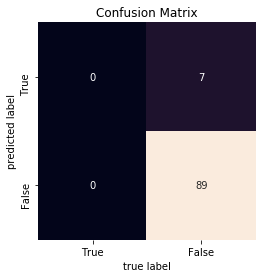

In [446]:
lucem_illud.plotConfusionMatrix(clf_knearest, xytest_data_df.loc[:,['vect','category']])

# SVMs

Now we will examine Support Vector Machines, an approach that creates the partition that preserves the "maximum margin" between classes.

We will use a few sub forums from reddit--which tend to share text rather than memes--namely `talesfromtechsupport`, `badroommates`, `weeabootales` and `relationships`. The top 100 text posts from each have been saved to `data/reddit.csv`.

In [ ]:
redditDf = pandas.read_csv('../data/reddit.csv', index_col = 0)

#Drop a couple missing values

redditDf = redditDf.dropna()

#Set category

redditDf['category'] = redditDf['subreddit']

#tokenize and normalize
redditDf['tokenized_text'] = redditDf['text'].apply(lambda x: nltk.word_tokenize(x))
redditDf['normalized_text'] = redditDf['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x, stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic))

We will tf.idf the data to make our vectors:

In [ ]:
redditTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
redditTFVects = redditTFVectorizer.fit_transform([' '.join(l) for l in redditDf['normalized_text']])
redditDf['vect'] = [np.array(v).flatten() for v in redditTFVects.todense()]

Initilize the model and make a train test split:

In [ ]:
holdBackFraction = .2
train_redditDf, test_redditDf = lucem_illud.trainTestSplit(redditDf, holdBackFraction=holdBackFraction)

In [ ]:
clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
#probability = True is slower but  lets you call predict_proba()
clf_svm.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

...and consider the results:

In [ ]:
lucem_illud.evaluateClassifier(clf_svm, test_redditDf)

In [ ]:
lucem_illud.plotConfusionMatrix(clf_svm, test_redditDf)

In [ ]:
lucem_illud.plotregions(clf_svm, test_redditDf)

# Neural Nets

We include an example of a simple neural network, the Multi-layer Perceptron (MLP) that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. The following figure shows a one hidden layer MLP with scalar output. ![title](../data/multilayerperceptron_network.png) The leftmost layer, known as the input layer, consists of a set of "neurons" $\{x_i | x_1, x_2, ..., x_m\}$ representing the input features (e.g., weighted words). Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation $w_1x_1 + w_2x_2 + ... + w_mx_m$, followed by a non-linear activation function $g(\cdot):R \rightarrow R$ - like the logistic or hyperbolic tan function. The output layer receives the values from the last hidden layer and transforms them into output values.

In [ ]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

In [ ]:
lucem_illud.evaluateClassifier(clf_nn, test_redditDf)

In [ ]:
lucem_illud.plotConfusionMatrix(clf_nn, test_redditDf)

In [ ]:
lucem_illud.plotregions(clf_nn, test_redditDf)

It performs very well.

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

In [456]:
# train NN model
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(xytrain_data_df['vect']), xytrain_data_df['cat'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

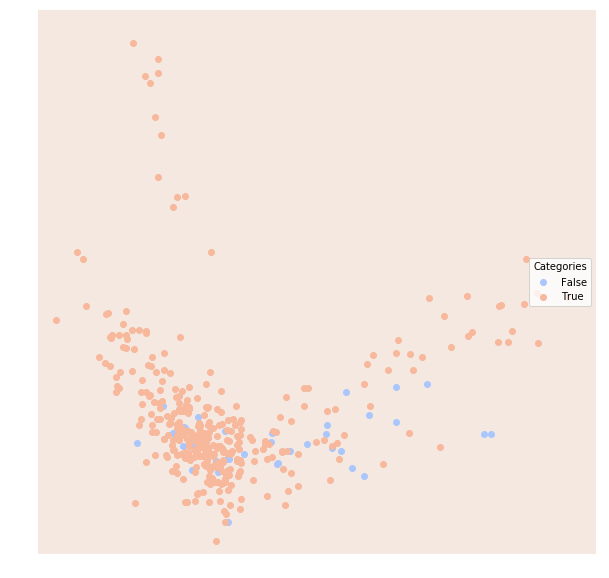

In [457]:
# visualize the model
lucem_illud.plotregions(clf_nn, xytrain_data_df.loc[:,['vect','category']])

In [451]:

lucem_illud.evaluateClassifier(clf_nn, xytest_data_df.loc[:,['vect','category']])

/Users/xiangyu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
False,0.5,0.072917,0.072917,0.000000,0.0
True,0.5,0.927083,0.072917,0.927083,1.0


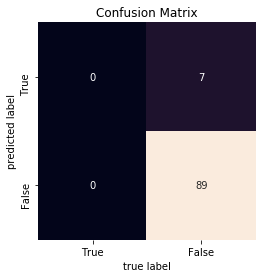

In [452]:
lucem_illud.plotConfusionMatrix(clf_nn, xytest_data_df.loc[:,['vect','category']])

None of them work well. Why?